# Análisis univariable

## Importación librerías y carga de datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

from EDA_function_tools import *


In [2]:
df = pd.read_excel("./data/airbnb_2.xlsx", index_col =0 )
df.head(5)

,id,host_id,host_is_superhost,name,host_name,host_since,amenities,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,distrito,precio_m2,price_disc,accommodates_disc,propietarios_disc,price_accommodates,price_bedrooms,antiguedad_host,champion,segmentacion_mercado
0,6369,13660,t,"Rooftop terrace room , ensuite bathroom",Simon,2009-04-16,"[""Wifi"", ""Shampoo"", ""Extra pillows and blanket...",1.0,Hispanoamérica,Chamartín,...,Chamartín,6039,02bajo,02parejas,02_pequeños_inversores,30.000000,60.0,12.41,False,mayoria_mercado
1,21853,83531,f,Bright and airy room,Abdel,2010-02-21,"[""Free parking on premises"", ""Shampoo"", ""Pocke...",2.0,Cármenes,Latina,...,Latina,2699,02bajo,01individual,02_pequeños_inversores,31.000000,31.0,11.55,False,mayoria_mercado
2,23001,82175,f,Apartmento Arganzuela- Madrid Rio,Jesus,2010-02-17,"[""Shampoo"", ""Pool"", ""Paid parking on premises""...",10.0,Legazpi,Arganzuela,...,Arganzuela,4595,02bajo,04grupos,02_pequeños_inversores,8.333333,10.0,11.56,False,mayoria_mercado
3,24805,346366726,f,Gran Via Studio Madrid,A,2020-05-15,"[""Shampoo"", ""Pack \u2019n Play/travel crib"", ""...",1.0,Universidad,Centro,...,Centro,6144,04alto,03familias,01_particular,30.666667,92.0,1.33,False,mayoria_mercado
4,26825,114340,f,Single Room whith private Bathroom,Agustina,2010-04-27,"[""Wifi"", ""Shampoo"", ""Dishes and silverware"", ""...",1.0,Legazpi,Arganzuela,...,Arganzuela,4595,01muy_bajo,01individual,01_particular,26.000000,26.0,11.38,False,mayoria_mercado


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18906 entries, 0 to 18905
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18906 non-null  int64         
 1   host_id                         18906 non-null  int64         
 2   host_is_superhost               18906 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18880 non-null  object        
 5   host_since                      18880 non-null  datetime64[ns]
 6   amenities                       18906 non-null  object        
 7   host_listings_count             18880 non-null  float64       
 8   neighbourhood_cleansed          18906 non-null  object        
 9   neighbourhood_group_cleansed    18906 non-null  object        
 10  latitude                        18906 non-null  float64       
 11  longitu

In [4]:
df_home = pd.read_excel('./data/airbnb_home.xlsx', index_col=0)
df_home.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11098 entries, 2 to 18885
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              11098 non-null  int64         
 1   host_id                         11098 non-null  int64         
 2   host_is_superhost               11098 non-null  object        
 3   name                            11098 non-null  object        
 4   host_name                       11086 non-null  object        
 5   host_since                      11086 non-null  datetime64[ns]
 6   amenities                       11098 non-null  object        
 7   host_listings_count             11086 non-null  float64       
 8   neighbourhood_cleansed          11098 non-null  object        
 9   neighbourhood_group_cleansed    11098 non-null  object        
 10  latitude                        11098 non-null  float64       
 11  longitu

## Funciones

In [5]:
# Obtener variables categóricas
def variables_categoricas(df):
    lista_categoricas = []
    for nombre in df.columns.tolist():
        if df[nombre].dtype == "object":
            lista_categoricas.append(nombre)
    return lista_categoricas

# Obtener la moda y fráficos de frecuencias absolutas y relativas de las varaibles categoricas
def graficos_categoricas(df,lista_categoricas):
    for categorica in lista_categoricas:
        frec_absoluta = df[categorica].value_counts()
        frec_relativa = df[categorica].value_counts(normalize=True)*100
        moda = df[categorica].mode()[0]

        # Moda
        print(f'La moda de \033[36m{categorica}\033[0m es: \033[36m{moda}\033[0m con un valor de \033[36m{frec_absoluta.max()}\033[0m \033[36m({frec_relativa.max():.2f}%)\033[0m')
        print(f'La frecuencia absoluta mínima es de la variable \033[36m{frec_absoluta.idxmin()}\033[0m con un valor de \033[36m{frec_absoluta.min()}\033[0m \033[36m({frec_relativa.min():.2f}%)\033[0m')
        print()
        print(frec_relativa)
        
        
        # Hago los gráficos
        f,ax = plt.subplots(nrows=1,ncols=2,figsize = (16,6))
        #fig.suptitle(f"Análisis:{categorica}")
    
        # Gráfico frecuencia absoluta
        sns.countplot(x = categorica, data = df, ax = ax[0],hue = categorica)
        ax[0].set_title(f"Frec. absoluta: {categorica}")
        ax[0].tick_params(axis='x', rotation=45)
        ax[0].legend_.remove()
    
        # Gráfico frecuencia relativa
        sns.barplot(x = frec_relativa.index, y = frec_relativa.values, hue = frec_relativa.index, ax=ax[1])
        ax[1].set_title(f"Frec. relativa: {categorica}")
        ax[1].tick_params(axis='x', rotation=45)
        ax[1].legend_.remove()

        plt.tight_layout()
        plt.show()

# Junto funciones de variables_categoricas y graficos_categoricas
def analisis_categoricas(df):
    lista_categoricas = variables_categoricas(df)
    graficos_categoricas(df,lista_categoricas)


# Dado que el ordenador no puede con todas a la vez lo hago por partes:
def graficos_categoricas_individual(df,categorica):
    
    frec_absoluta = df[categorica].value_counts()
    frec_relativa = df[categorica].value_counts(normalize=True)*100
    moda = df[categorica].mode()[0]

    print(f'La moda de \033[36m{categorica}\033[0m es: \033[36m{moda}\033[0m con un valor de \033[36m{frec_absoluta.max()}\033[0m \033[36m({frec_relativa.max():.2f}%)\033[0m')
    print(f'La frecuencia absoluta mínima es de la variable \033[36m{frec_absoluta.idxmin()}\033[0m con un valor de \033[36m{frec_absoluta.min()}\033[0m \033[36m({frec_relativa.min():.2f}%)\033[0m')
    print()
    print(frec_relativa)
        
        
    # Hago los gráficos
    f,ax = plt.subplots(nrows=1,ncols=2,figsize = (16,6))
    #fig.suptitle(f"Análisis:{categorica}")
    
    # Gráfico frecuencia absoluta
    sns.countplot(x = categorica, data = df, ax = ax[0],hue = categorica)
    ax[0].set_title(f"Frec. absoluta: {categorica}")
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].legend_.remove()
    
    # Gráfico frecuencia relativa
    sns.barplot(x = frec_relativa.index, y = frec_relativa.values, hue = frec_relativa.index, ax=ax[1])
    ax[1].set_title(f"Frec. relativa: {categorica}")
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].legend_.remove()

    plt.tight_layout()
    plt.show()

# Meto en un lista las variable numéricas
def variables_numericas(df):
    lista_numericas = []
    for numerica in df.columns.tolist():
        cardinalidad = df[numerica].nunique()/(len(df))*100
        if cardinalidad < 40:
            if df[numerica].dtype == "float64" or df[numerica].dtype == "int64":
                lista_numericas.append(numerica)
        else:
            pass
    return lista_numericas

# Estadística descriptiva numéricas
def estadistica_descriptiva_numericas(df):
    # Conecto la función variables_numericas con esta función
    lista_numericas = variables_numericas(df)
         
    # describe() individual por variable numerica y completo con mas estadisticos 
    #print("A continuación de forma individual")
    for numerica in lista_numericas:
        
        print(f'Para la variable \033[36m{numerica}\033[0m')     
        fig,axs = plt.subplots(1,2, figsize = (12,6))
        sns.histplot(x= numerica, data = df, kde = True, ax = axs[0])
        sns.boxplot(x = numerica, data = df, ax = axs[1],whis=1.5,)
        #sns.swarmplot(x= numerica, data = df, ax = axs[2])
        plt.show();

        estadisticos = df[numerica].describe().T # minimo, maximo, 25%,50%,75%, std, count.
        mediana = df[numerica].median() # mediana
        moda = df[numerica].mode()[0] # moda
        iqr = df[numerica].describe().loc['75%']-df[numerica].describe().loc['25%']
        cv = round(df[numerica].describe().loc['std']/df[numerica].describe().loc['mean']*100,2)
               
        print(f'Los estadísticos son \n \033[36m{estadisticos}\033[0m')
        print(f'La mediana es \033[36m{mediana}\033[0m')
        print(f'La moda es \033[36m{moda}\033[0m')
        print(f'El IQR es de \033[36m{iqr}\033[0m')
        print(f'El CV es de \033[36m{cv}\033[0m')
        print()
      
     

# Junto las otras. Me lo podría ahorrar pero lo dejo así para que tenga el mismo nombre que la otra
def analisis_numericas(df):
    estadistica_descriptiva_numericas(df)

def grafico_numerica(df,numerica):
    # Grafico los datos estadisticos por variable numerica
    fig,axs = plt.subplots(1,2, figsize = (14,5))
    sns.histplot(x= numerica, data = df, kde = True, ax = axs[0])
    sns.boxplot(x = numerica, data = df, ax = axs[1])
    #sns.swarmplot(x= numerica, data = df, ax = axs[2])
    plt.show()



### Comprobación separación datos por tipo inmueble

In [6]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

In [7]:
# DataFream con los datos de 'Private room' (Habitación privada)
df_private=df.loc[df["room_type"]== "Private room"]
df_private.shape

(7390, 34)

In [8]:
# DataFream con los datos de 'Shared room' (Habitación compartida)
df_shared = df.loc[df["room_type"]=="Shared room"]
df_shared.shape

(258, 34)

In [9]:
# DataFream con los datos de 'Hotel room' (Habitación hotel)
df_hotel = df.loc[df["room_type"] == "Hotel room"]

## Análisis univariable df_home

In [10]:
df_home.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11098 entries, 2 to 18885
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              11098 non-null  int64         
 1   host_id                         11098 non-null  int64         
 2   host_is_superhost               11098 non-null  object        
 3   name                            11098 non-null  object        
 4   host_name                       11086 non-null  object        
 5   host_since                      11086 non-null  datetime64[ns]
 6   amenities                       11098 non-null  object        
 7   host_listings_count             11086 non-null  float64       
 8   neighbourhood_cleansed          11098 non-null  object        
 9   neighbourhood_group_cleansed    11098 non-null  object        
 10  latitude                        11098 non-null  float64       
 11  longitu

### Variables categóricas


#### `host_is_superhost`

La moda de host_is_superhost es: f con un valor de 8652 (77.96%)
La frecuencia absoluta mínima es de la variable t con un valor de 2446 (22.04%)

host_is_superhost
f    77.959993
t    22.040007
Name: proportion, dtype: float64


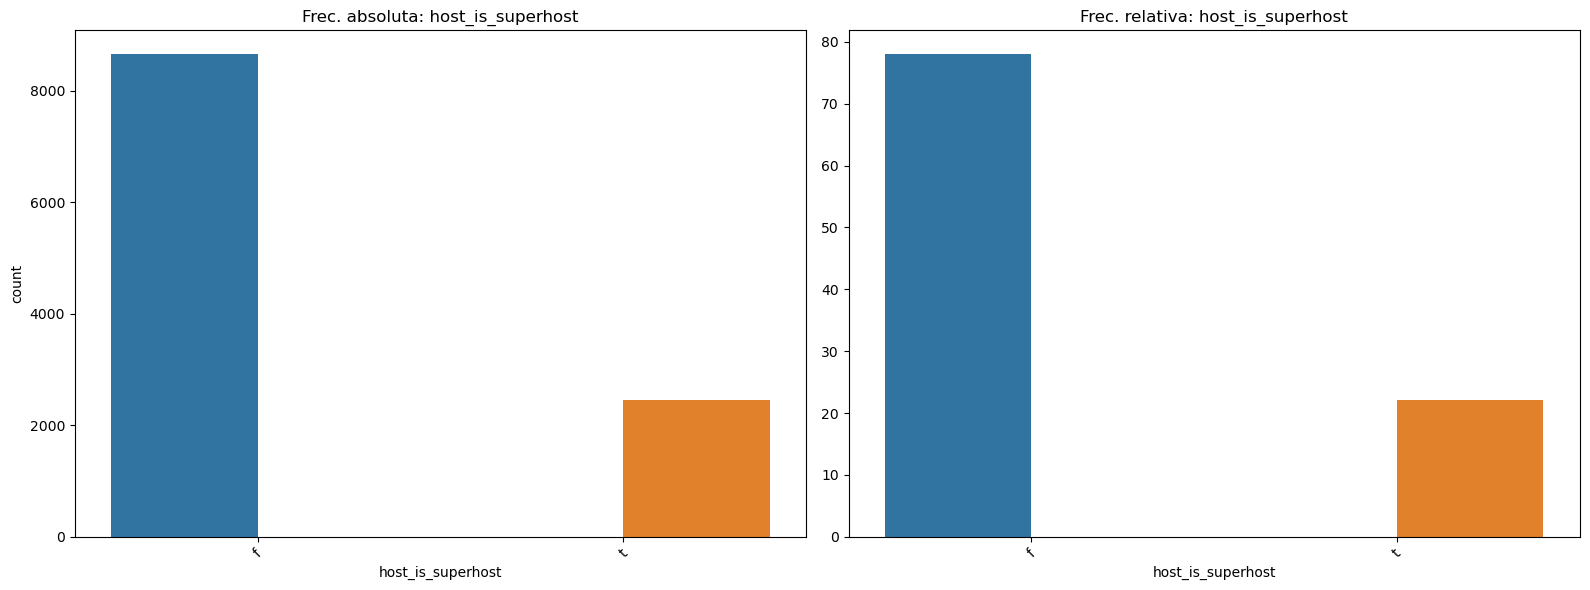

In [11]:
graficos_categoricas_individual(df_home,'host_is_superhost')

##### Observación:
Tan solo un 22% es superhost en la oferta de pisos

#### `name `

In [12]:
df_home['name'].value_counts()

name
2Bedroom 2Bathroom apartament in Nuñez de Balboa      13
APARTMENT 4PAX GRAN VIA CENTRO PUERTA SOL MALASAÑA    13
Nuevo Apartamento junto a la Gran Vía de Madrid       12
Apartamento en el centro de Madrid                    11
2 Bedroom 1 Bathroom apartment with pool in Atocha    10
                                                      ..
Lovely Flat in Madrid Center!!!                        1
Apt. S. Lorenzo MALASAÑA/CHUECA perfect 4 COUPLES      1
Bonito apartamento( cerca Plaza   Las Ventas)          1
Plaza Sant Ana, the heart of Madrid                    1
Plaza de Callao II                                     1
Name: count, Length: 10810, dtype: int64

No se puede sacar gran cosa de esto.

#### `host_name`

In [13]:
df_home['host_name'].value_counts()

host_name
Marco      203
Daniel     194
Javier     161
Carlos     131
Luis       122
          ... 
Ronny        1
Oussama      1
Jeldrik      1
Fabiana      1
Milton       1
Name: count, Length: 2436, dtype: int64

##### Observación: 
Algunos nombres coinciden que son los pisos propiedad de una sola empresa o bien que los gestiona.

#### 'amenities'

In [14]:
df_home['amenities'].value_counts()

amenities
["Wifi", "Microwave", "Dishes and silverware", "Iron", "Air conditioning", "Bed linens", "TV", "Dishwasher", "Oven", "Coffee maker", "Elevator", "Stove", "Refrigerator", "Long term stays allowed", "Washer", "Heating", "Essentials", "Kitchen", "Hair dryer"]                                                                                                                                                                                                     40
["Wifi", "Microwave", "Dishes and silverware", "Iron", "Air conditioning", "Bed linens", "TV", "Dishwasher", "Oven", "Coffee maker", "Elevator", "Stove", "Patio or balcony", "Refrigerator", "Long term stays allowed", "Washer", "Heating", "Essentials", "Kitchen", "Hair dryer"]                                                                                                                                                                                 31
["Long term stays allowed"]                                                   

In [15]:
df_home['amenities'].unique()

array(['["Shampoo", "Pool", "Paid parking on premises", "Stove", "Long term stays allowed", "Dryer", "Bathtub", "Wifi", "Extra pillows and blankets", "Game console", "Crib", "Dedicated workspace", "Hangers", "Washer", "Cooking basics", "Dishes and silverware", "Ethernet connection", "Iron", "Dishwasher", "Coffee maker", "Elevator", "Hot water", "Hair dryer", "Kitchen", "Room-darkening shades", "Refrigerator", "Microwave", "Single level home", "Children\\u2019s dinnerware", "Bed linens", "TV", "Luggage dropoff allowed", "Paid parking off premises", "Children\\u2019s books and toys", "Oven", "Patio or balcony", "Heating", "Essentials"]',
       '["Shampoo", "Pack \\u2019n Play/travel crib", "Paid parking on premises", "Stove", "Long term stays allowed", "Host greets you", "Wifi", "Cleaning before checkout", "Air conditioning", "Dedicated workspace", "Hangers", "Washer", "Cooking basics", "Dishes and silverware", "Iron", "Coffee maker", "Elevator", "Hot water", "Hair dryer", "Refrigerator

Demasiado texto como para saca conclusiones y similitudes.

#### `neighbourhood_cleansed`   

In [16]:
df_home['neighbourhood_cleansed'].nunique()

127

In [17]:
df_home['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Embajadores    1613
Universidad    1246
Palacio        1090
Sol             789
Justicia        633
               ... 
Orcasitas         2
El Pardo          2
Corralejos        1
Horcajo           1
Pavones           1
Name: count, Length: 127, dtype: int64

In [18]:
df_home['neighbourhood_cleansed'].value_counts(normalize=True).round(3)*100

neighbourhood_cleansed
Embajadores    14.5
Universidad    11.2
Palacio         9.8
Sol             7.1
Justicia        5.7
               ... 
Orcasitas       0.0
El Pardo        0.0
Corralejos      0.0
Horcajo         0.0
Pavones         0.0
Name: proportion, Length: 127, dtype: float64

In [19]:
df_home['neighbourhood_cleansed'].unique()


array(['Legazpi', 'Universidad', 'Sol', 'Embajadores', 'Palacio',
       'Justicia', 'Goya', 'Recoletos', 'Valverde', 'Almagro',
       'Rios Rosas', 'Cortes', 'Pinar del Rey', 'Trafalgar', 'Castellana',
       'Valdefuentes', 'Aluche', 'Delicias', 'Fuente del Berro',
       'Niño Jesús', 'Ibiza', 'Arapiles', 'Jerónimos', 'Concepción',
       'Costillares', 'Gaztambide', 'Casco Histórico de Barajas',
       'Palos de Moguer', 'Acacias', 'Castilla', 'Pacífico', 'Lista',
       'Puerta Bonita', 'Los Angeles', 'El Viso', 'Vallehermoso',
       'San Diego', 'Argüelles', 'Castillejos', 'Rejas', 'Simancas',
       'Timón', 'Ciudad Universitaria', 'Marroquina', 'Cuatro Caminos',
       'San Juan Bautista', 'Almenara', 'San Andrés',
       'Casco Histórico de Vicálvaro', 'Atocha', 'Nueva España', 'Arcos',
       'Ventas', 'Fontarrón', 'Guindalera', 'Berruguete', 'Comillas',
       'Prosperidad', 'Puerta del Angel', 'Chopera', 'Adelfas',
       'Quintana', 'Casa de Campo', 'Imperial', 'Aravaca'

##### Observaciones:
Los que más anuncios tienen son de (valor en %):
- Embajadores    14.5
- Universidad    11.2
- Palacio         9.8
- Sol             7.1
- Justicia        5.7

Los que menos anuncios tienen son de (valor en %):
- Orcasitas       0.0
- El Pardo        0.0
- Corralejos      0.0
- Horcajo         0.0
- Pavones         0.0

#### `neighbourhood_group_cleansed`

In [20]:
df_home['neighbourhood_group_cleansed'].nunique()

21

In [21]:
df_home['neighbourhood_group_cleansed'].value_counts()

neighbourhood_group_cleansed
Centro                   5994
Salamanca                 880
Chamberí                  644
Arganzuela                577
Tetuán                    478
Retiro                    396
Chamartín                 340
Moncloa - Aravaca         252
Carabanchel               251
Ciudad Lineal             209
Puente de Vallecas        203
Latina                    180
Hortaleza                 172
San Blas - Canillejas     156
Fuencarral - El Pardo     123
Usera                      92
Barajas                    42
Villaverde                 42
Villa de Vallecas          28
Moratalaz                  26
Vicálvaro                  13
Name: count, dtype: int64

In [22]:
df_home['neighbourhood_group_cleansed'].value_counts(normalize=True).round(3)*100

neighbourhood_group_cleansed
Centro                   54.0
Salamanca                 7.9
Chamberí                  5.8
Arganzuela                5.2
Tetuán                    4.3
Retiro                    3.6
Chamartín                 3.1
Moncloa - Aravaca         2.3
Carabanchel               2.3
Ciudad Lineal             1.9
Puente de Vallecas        1.8
Latina                    1.6
Hortaleza                 1.5
San Blas - Canillejas     1.4
Fuencarral - El Pardo     1.1
Usera                     0.8
Barajas                   0.4
Villaverde                0.4
Villa de Vallecas         0.3
Moratalaz                 0.2
Vicálvaro                 0.1
Name: proportion, dtype: float64

##### Observaciones:
Los 5 distritos con mayor número de anuncios son:
- Centro                   54.0
- Salamanca                 7.9
- Chamberí                  5.8
- Arganzuela                5.2
- Tetuán                    4.3

Los 5 distritos con menor número de anuncios son:
- Barajas                   0.4
- Villaverde                0.4
- Villa de Vallecas         0.3
- Moratalaz                 0.2
- Vicálvaro                 0.1

#### `property_type`

In [23]:
df_home['property_type'].nunique()

25

In [24]:
df_home['property_type'].unique()

array(['Entire rental unit', 'Entire loft', 'Entire condominium (condo)',
       'Entire serviced apartment', 'Entire residential home',
       'Entire guest suite', 'Entire bungalow', 'Casa particular',
       'Dome house', 'Entire place', 'Entire chalet',
       'Entire bed and breakfast', 'Entire townhouse',
       'Room in aparthotel', 'Entire guesthouse', 'Floor', 'Hut',
       'Camper/RV', 'Entire home/apt', 'Entire villa', 'Tiny house',
       'Yurt', 'Entire cottage', 'Entire cabin', 'Cave'], dtype=object)

In [25]:
df_home['property_type'].value_counts()

property_type
Entire rental unit            9404
Entire loft                    603
Entire condominium (condo)     434
Entire serviced apartment      265
Entire residential home        241
Entire guest suite              29
Entire townhouse                18
Entire guesthouse               14
Tiny house                      14
Entire chalet                   13
Casa particular                 12
Entire place                    10
Camper/RV                       10
Floor                            8
Entire home/apt                  5
Entire villa                     4
Entire cabin                     3
Room in aparthotel               3
Dome house                       2
Yurt                             1
Entire cottage                   1
Hut                              1
Entire bungalow                  1
Entire bed and breakfast         1
Cave                             1
Name: count, dtype: int64

In [26]:
df_home['property_type'].value_counts(normalize=True).round(3)*100

property_type
Entire rental unit            84.7
Entire loft                    5.4
Entire condominium (condo)     3.9
Entire serviced apartment      2.4
Entire residential home        2.2
Entire guest suite             0.3
Entire townhouse               0.2
Entire guesthouse              0.1
Tiny house                     0.1
Entire chalet                  0.1
Casa particular                0.1
Entire place                   0.1
Camper/RV                      0.1
Floor                          0.1
Entire home/apt                0.0
Entire villa                   0.0
Entire cabin                   0.0
Room in aparthotel             0.0
Dome house                     0.0
Yurt                           0.0
Entire cottage                 0.0
Hut                            0.0
Entire bungalow                0.0
Entire bed and breakfast       0.0
Cave                           0.0
Name: proportion, dtype: float64

##### Observaciones:
Del tipo de propiedad (dentro de la variable 'Entire home/apt'), en %:
- Entire rental unit            84.7
- Entire loft                    5.4
- Entire condominium (condo)     3.9
- Entire serviced apartment      2.4
- Entire residential home        2.2


#### `price_disc`

In [27]:
df_home['price_disc'].value_counts()

price_disc
04alto        2777
05muy_alto    2751
02bajo        2672
03medio       2598
01muy_bajo     300
Name: count, dtype: int64

La moda de price_disc es: 04alto con un valor de 2777 (25.02%)
La frecuencia absoluta mínima es de la variable 01muy_bajo con un valor de 300 (2.70%)

price_disc
04alto        25.022527
05muy_alto    24.788250
02bajo        24.076410
03medio       23.409623
01muy_bajo     2.703190
Name: proportion, dtype: float64


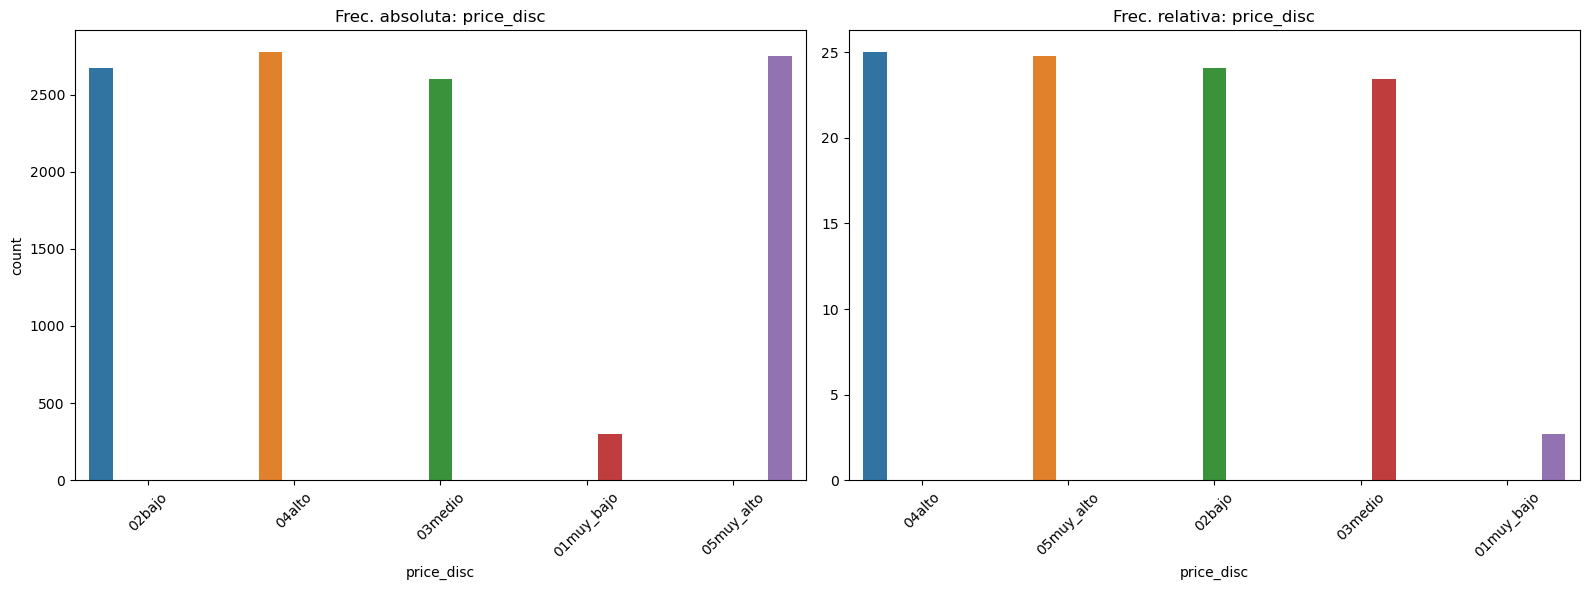

In [28]:
graficos_categoricas_individual(df_home,'price_disc')

##### Observaciones:
- Exceptuando los valores bajos (por debajo de 30€), en el resto tenemos una distribución uniforme, en parte debido a que se han cogido los valores de los cuartiles para hacer la discretización.

#### `accommodates_disc`

In [29]:
df_home['accommodates_disc'].value_counts()

accommodates_disc
03familias      6054
02parejas       2709
04grupos        2211
01individual     124
Name: count, dtype: int64

La moda de accommodates_disc es: 03familias con un valor de 6054 (54.55%)
La frecuencia absoluta mínima es de la variable 01individual con un valor de 124 (1.12%)

accommodates_disc
03familias      54.550369
02parejas       24.409804
04grupos        19.922509
01individual     1.117318
Name: proportion, dtype: float64


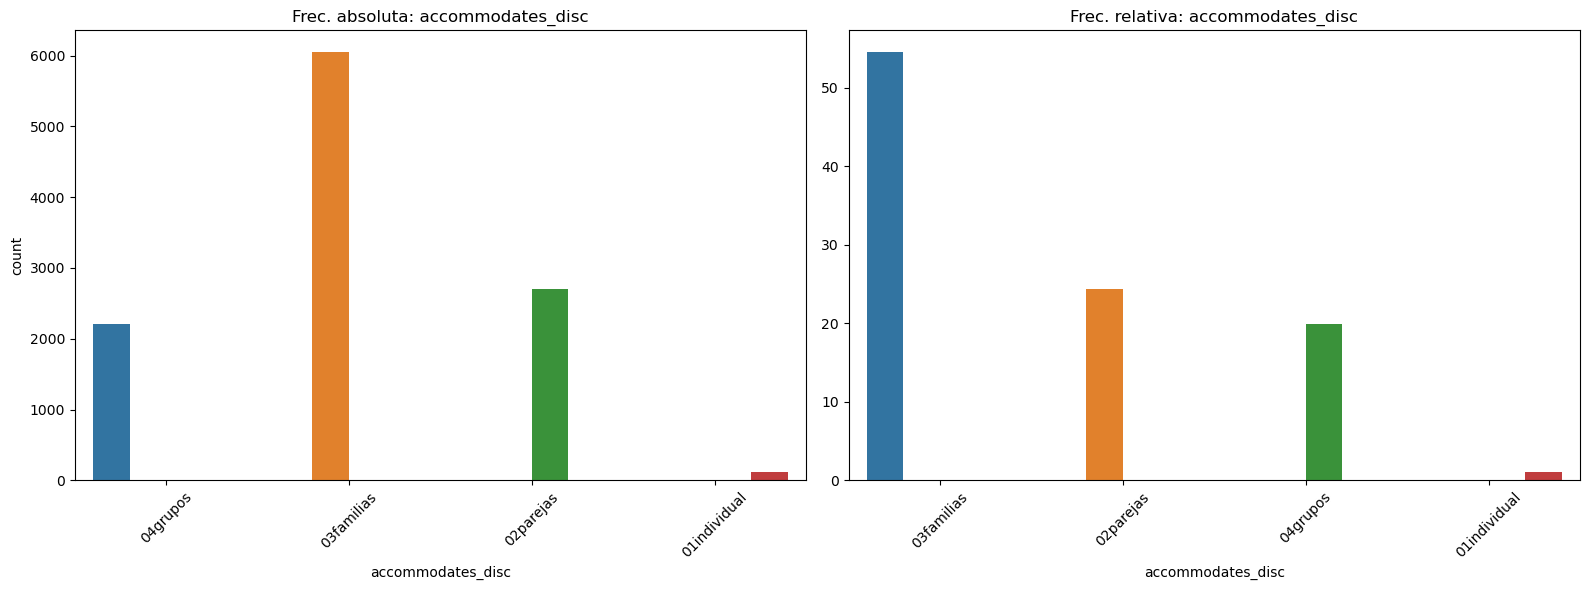

In [30]:
graficos_categoricas_individual(df_home,'accommodates_disc')

##### Observaciones:
- La mayor parte de la oferta de pisos va encaminada a albergar entre 3 y 5 personas:
    - 03familias      54.550369
    - 02parejas       24.409804
    - 04grupos        19.922509
    - 01individual     1.117318

#### `propietarios_disc`

In [31]:
df_home['propietarios_disc'].value_counts()

propietarios_disc
01_particular             4638
02_pequeños_inversores    2632
04_grandes_empresas       2336
03_grandes_inversores     1492
Name: count, dtype: int64

La moda de propietarios_disc es: 01_particular con un valor de 4638 (41.79%)
La frecuencia absoluta mínima es de la variable 03_grandes_inversores con un valor de 1492 (13.44%)

propietarios_disc
01_particular             41.791314
02_pequeños_inversores    23.715985
04_grandes_empresas       21.048838
03_grandes_inversores     13.443864
Name: proportion, dtype: float64


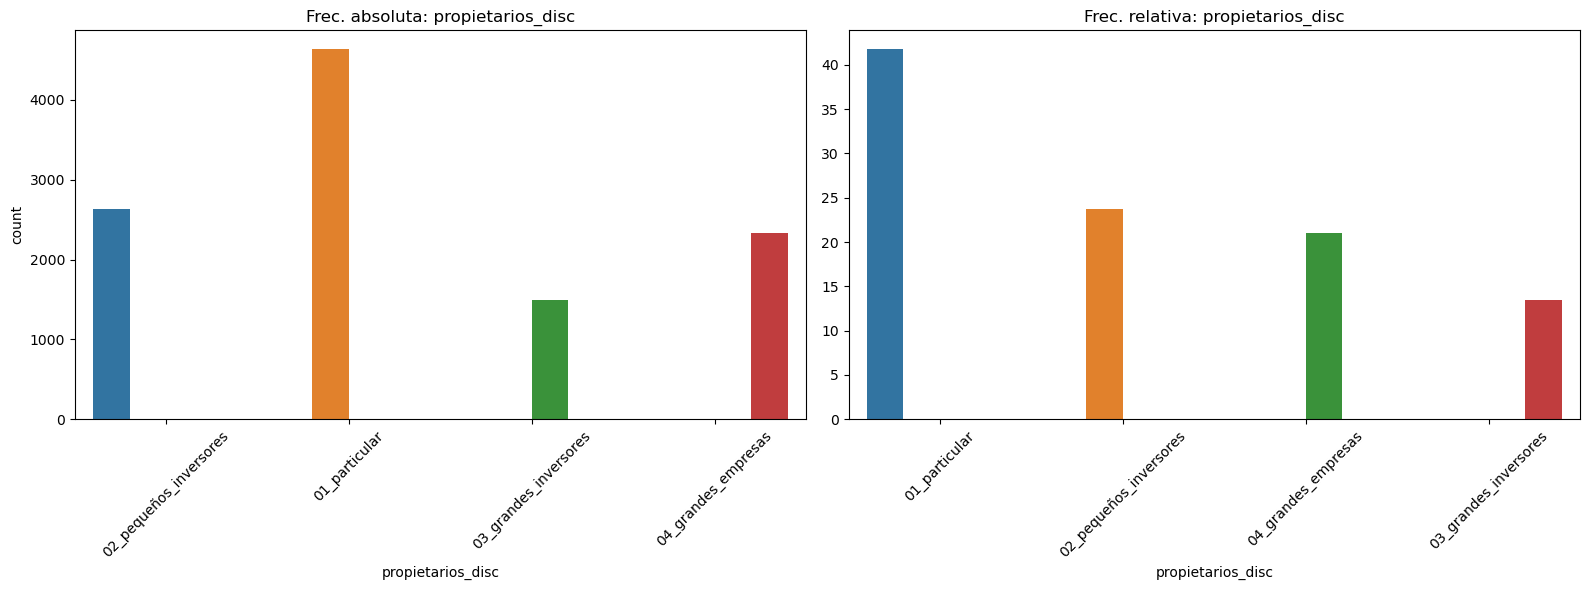

In [32]:
graficos_categoricas_individual(df_home,'propietarios_disc')

##### Observaciones:
- Si bien el mayor porcentaje se encuentra ente los particulares con un 41.7%, realmente la mayoría de oferta de pisos de alquiler está manos de pesonaso empresas que tienen más de un inmueble (59,3%)

#### `segmentacion_mercado`

In [33]:
df_home['segmentacion_mercado'].value_counts()

segmentacion_mercado
mayoria_mercado         10623
lujo                      450
oportunismo_champion       25
Name: count, dtype: int64

In [34]:
df_home['segmentacion_mercado'].value_counts(normalize=True).round(3)*100

segmentacion_mercado
mayoria_mercado         95.7
lujo                     4.1
oportunismo_champion     0.2
Name: proportion, dtype: float64

La moda de segmentacion_mercado es: mayoria_mercado con un valor de 10623 (95.72%)
La frecuencia absoluta mínima es de la variable oportunismo_champion con un valor de 25 (0.23%)

segmentacion_mercado
mayoria_mercado         95.719950
lujo                     4.054785
oportunismo_champion     0.225266
Name: proportion, dtype: float64


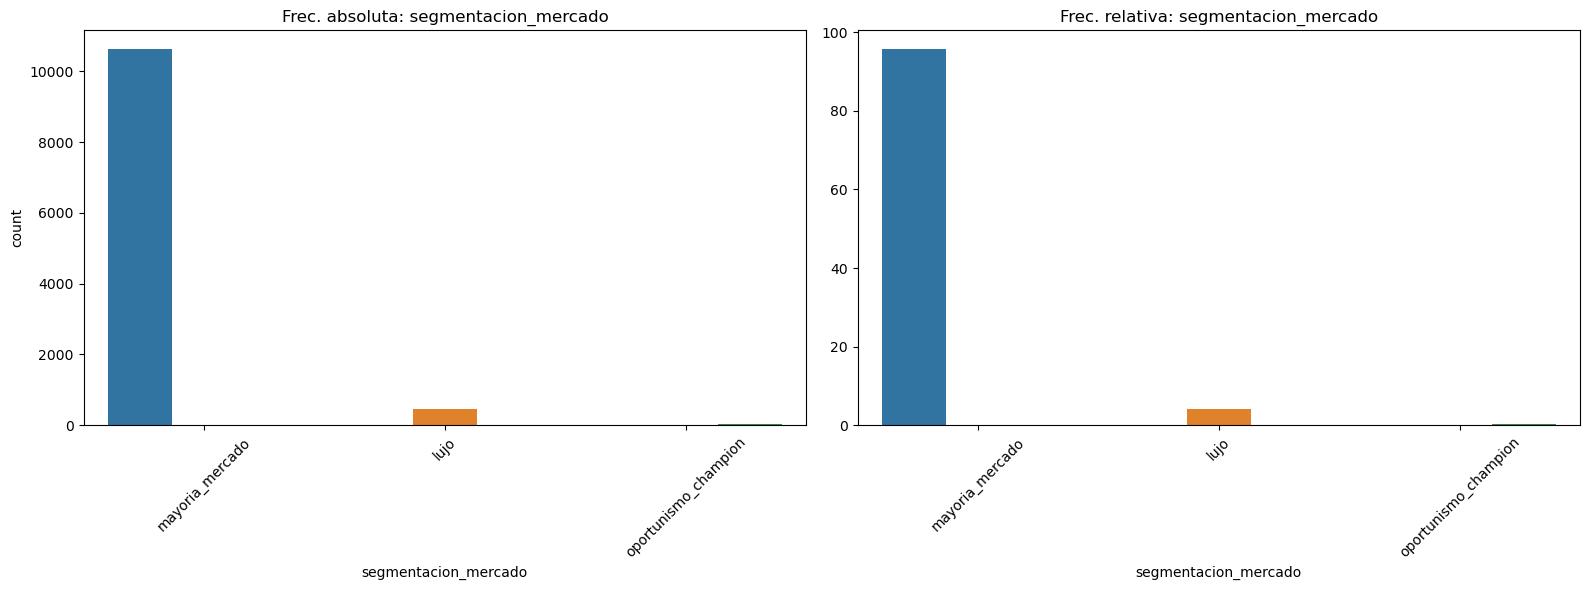

In [35]:
graficos_categoricas_individual(df_home,'segmentacion_mercado')

### Variables numéricas

### Primer análisis

In [36]:
lista = variables_numericas(df_home)
df_home[lista].describe().T

,count,mean,std,min,25%,50%,75%,max
host_listings_count,11086.0,1.694326e+01,40.577061,0.000000,1.0000,2.00,11.000000,515.00
accommodates,11098.0,4.020274e+00,1.945561,1.000000,2.0000,4.00,5.000000,16.00
bedrooms,11098.0,1.627230e+00,0.878018,1.000000,1.0000,1.00,2.000000,10.00
beds,11098.0,2.357091e+00,1.527432,0.000000,1.0000,2.00,3.000000,18.00
price,11098.0,1.115079e+02,107.469811,1.000000,60.0000,82.00,121.000000,999.00
minimum_nights,11098.0,6.962606e+00,30.483467,1.000000,1.0000,2.00,3.000000,1125.00
maximum_nights,11098.0,1.778321e+03,105469.454888,1.000000,240.0000,1125.00,1125.000000,11111111.00
number_of_reviews,11098.0,4.152901e+01,72.164985,0.000000,1.0000,10.00,49.000000,744.00
review_scores_rating,8906.0,4.570692e+00,0.681492,0.000000,4.5000,4.74,4.910000,5.00
calculated_host_listings_count,11098.0,1.458470e+01,32.297017,1.000000,1.0000,2.00,10.000000,194.00


Para la variable host_listings_count


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


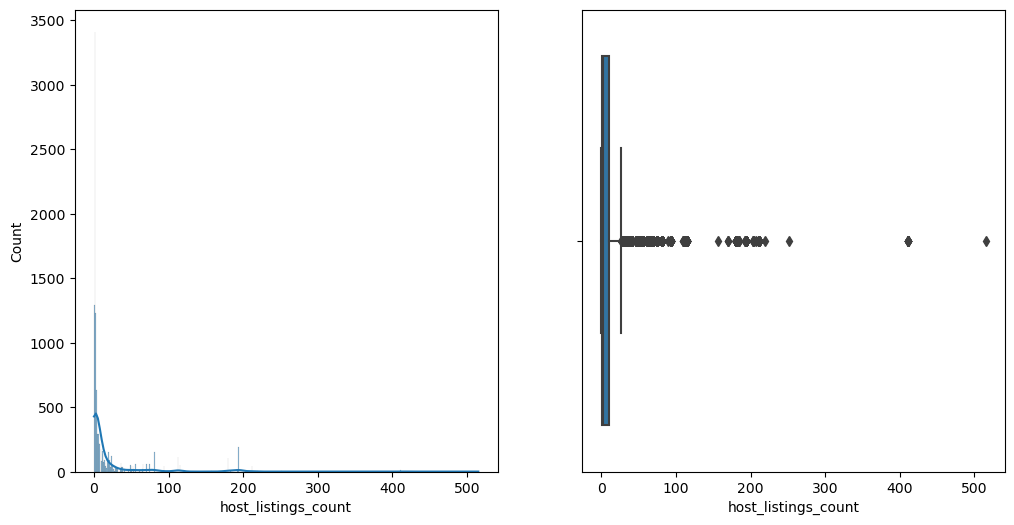

Los estadísticos son 
 count    11086.000000
mean        16.943262
std         40.577061
min          0.000000
25%          1.000000
50%          2.000000
75%         11.000000
max        515.000000
Name: host_listings_count, dtype: float64
La mediana es 2.0
La moda es 1.0
El IQR es de 10.0
El CV es de 239.49

Para la variable accommodates


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


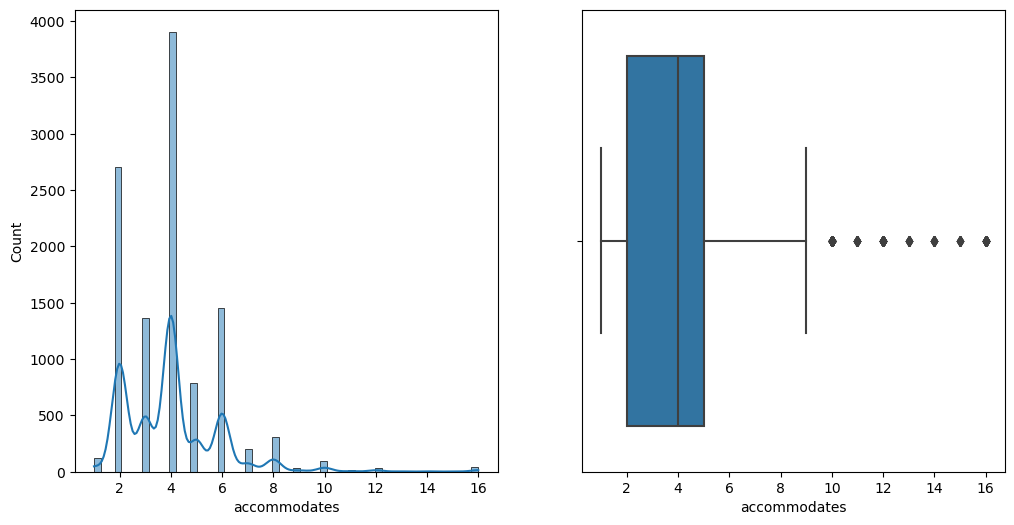

Los estadísticos son 
 count    11098.000000
mean         4.020274
std          1.945561
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         16.000000
Name: accommodates, dtype: float64
La mediana es 4.0
La moda es 4
El IQR es de 3.0
El CV es de 48.39

Para la variable bedrooms


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


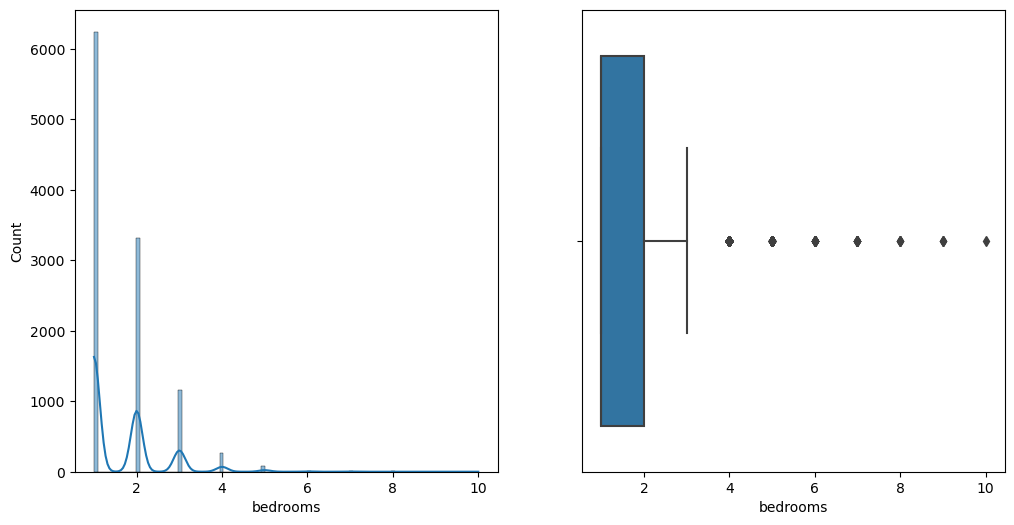

Los estadísticos son 
 count    11098.000000
mean         1.627230
std          0.878018
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: bedrooms, dtype: float64
La mediana es 1.0
La moda es 1
El IQR es de 1.0
El CV es de 53.96

Para la variable beds


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


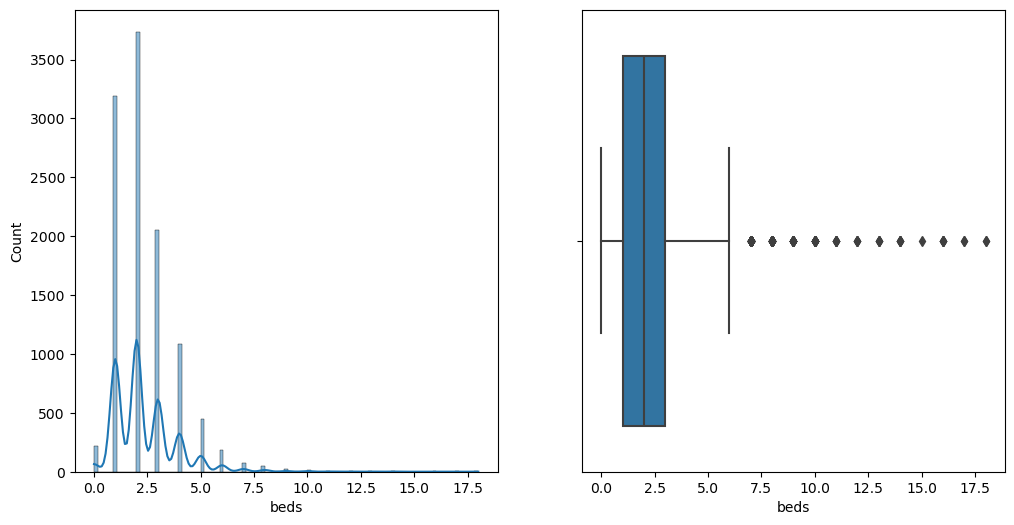

Los estadísticos son 
 count    11098.000000
mean         2.357091
std          1.527432
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: beds, dtype: float64
La mediana es 2.0
La moda es 2
El IQR es de 2.0
El CV es de 64.8

Para la variable price


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


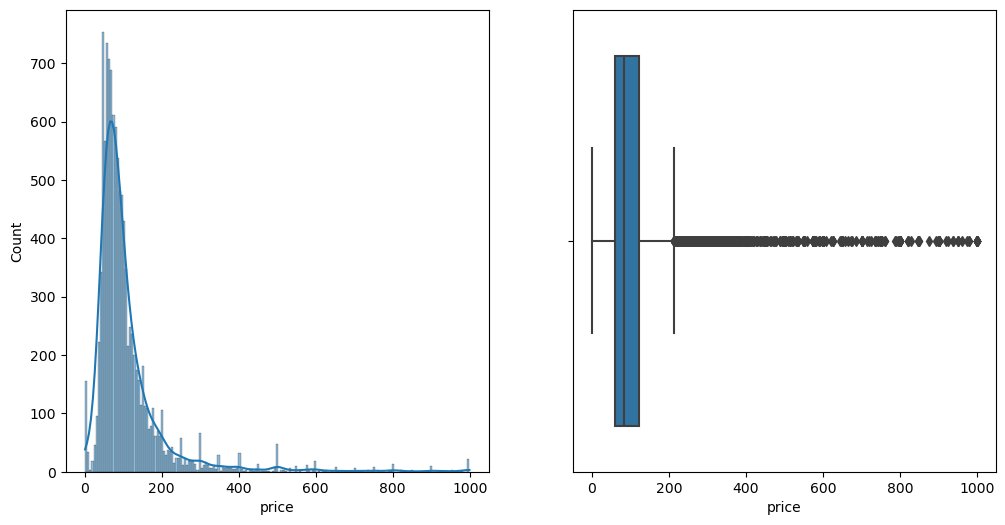

Los estadísticos son 
 count    11098.000000
mean       111.507887
std        107.469811
min          1.000000
25%         60.000000
50%         82.000000
75%        121.000000
max        999.000000
Name: price, dtype: float64
La mediana es 82.0
La moda es 60.0
El IQR es de 61.0
El CV es de 96.38

Para la variable minimum_nights


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


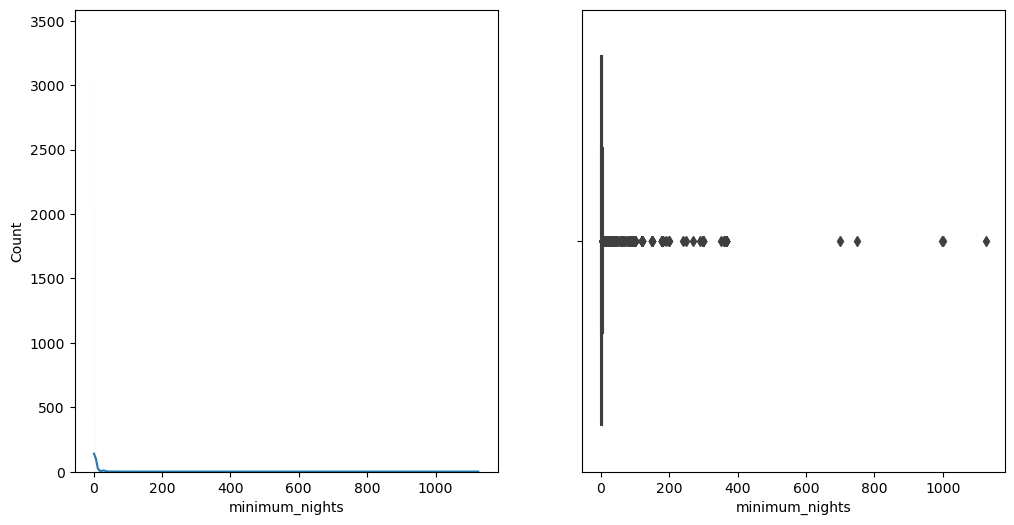

Los estadísticos son 
 count    11098.000000
mean         6.962606
std         30.483467
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1125.000000
Name: minimum_nights, dtype: float64
La mediana es 2.0
La moda es 1
El IQR es de 2.0
El CV es de 437.82

Para la variable maximum_nights


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


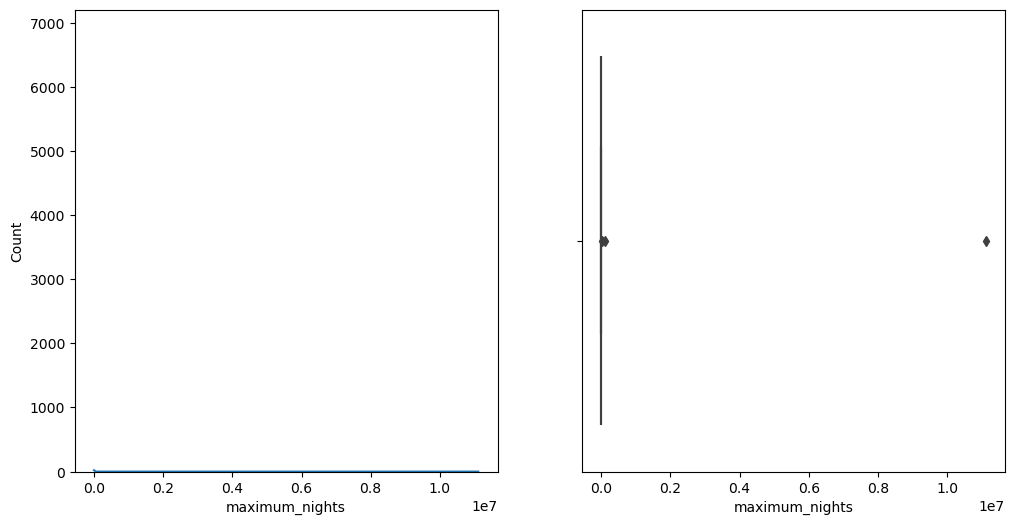

Los estadísticos son 
 count    1.109800e+04
mean     1.778321e+03
std      1.054695e+05
min      1.000000e+00
25%      2.400000e+02
50%      1.125000e+03
75%      1.125000e+03
max      1.111111e+07
Name: maximum_nights, dtype: float64
La mediana es 1125.0
La moda es 1125
El IQR es de 885.0
El CV es de 5930.85

Para la variable number_of_reviews


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


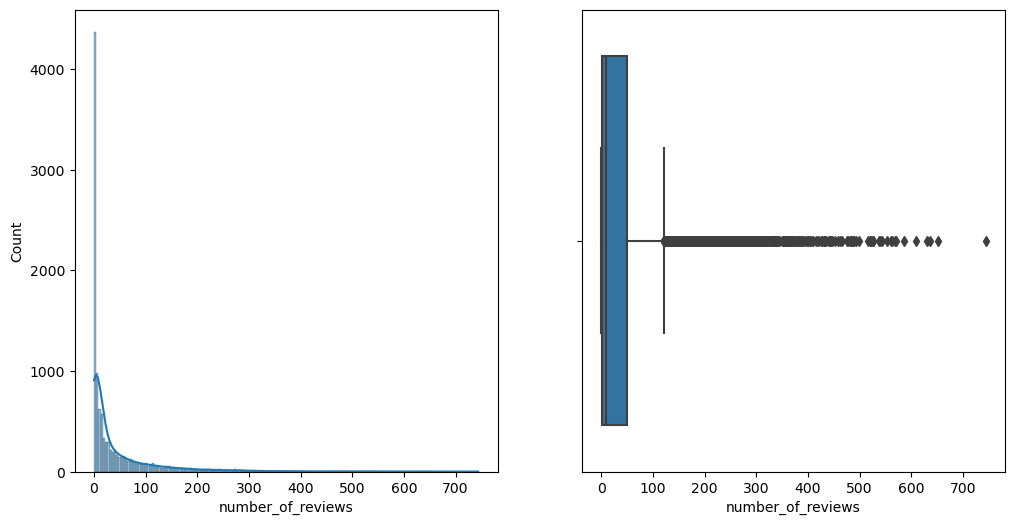

Los estadísticos son 
 count    11098.000000
mean        41.529014
std         72.164985
min          0.000000
25%          1.000000
50%         10.000000
75%         49.000000
max        744.000000
Name: number_of_reviews, dtype: float64
La mediana es 10.0
La moda es 0
El IQR es de 48.0
El CV es de 173.77

Para la variable review_scores_rating


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


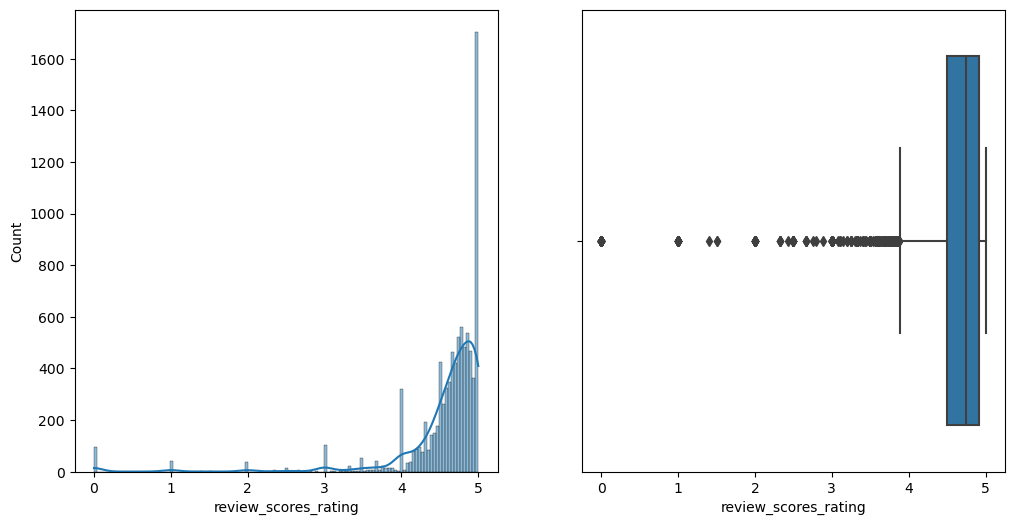

Los estadísticos son 
 count    8906.000000
mean        4.570692
std         0.681492
min         0.000000
25%         4.500000
50%         4.740000
75%         4.910000
max         5.000000
Name: review_scores_rating, dtype: float64
La mediana es 4.74
La moda es 5.0
El IQR es de 0.41000000000000014
El CV es de 14.91

Para la variable calculated_host_listings_count


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


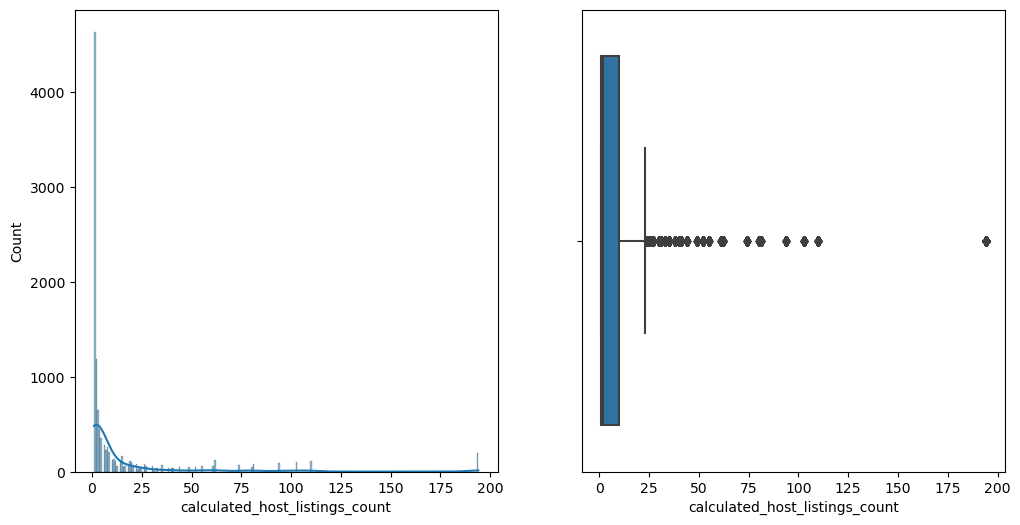

Los estadísticos son 
 count    11098.000000
mean        14.584700
std         32.297017
min          1.000000
25%          1.000000
50%          2.000000
75%         10.000000
max        194.000000
Name: calculated_host_listings_count, dtype: float64
La mediana es 2.0
La moda es 1
El IQR es de 9.0
El CV es de 221.44

Para la variable bathrooms


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


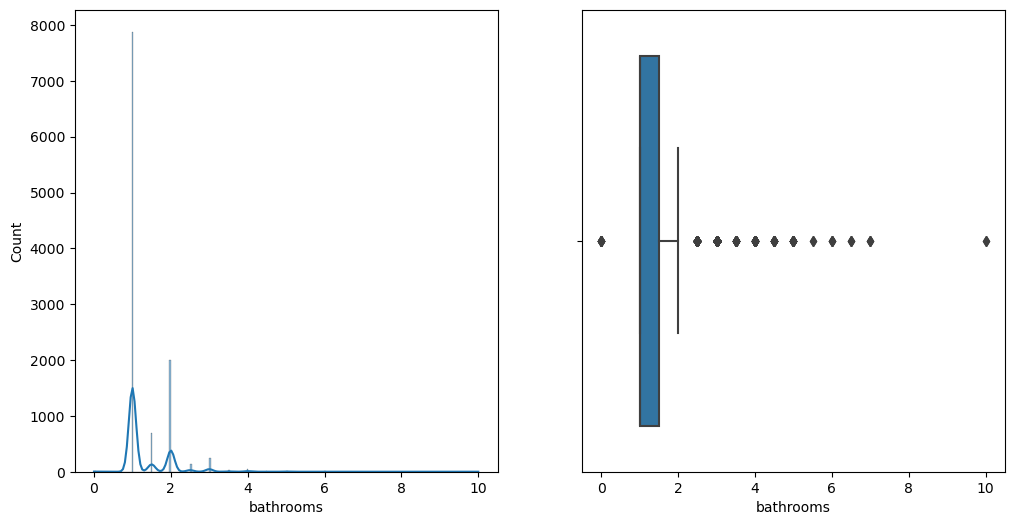

Los estadísticos son 
 count    11098.000000
mean         1.313029
std          0.602743
min          0.000000
25%          1.000000
50%          1.000000
75%          1.500000
max         10.000000
Name: bathrooms, dtype: float64
La mediana es 1.0
La moda es 1.0
El IQR es de 0.5
El CV es de 45.9

Para la variable precio_m2


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


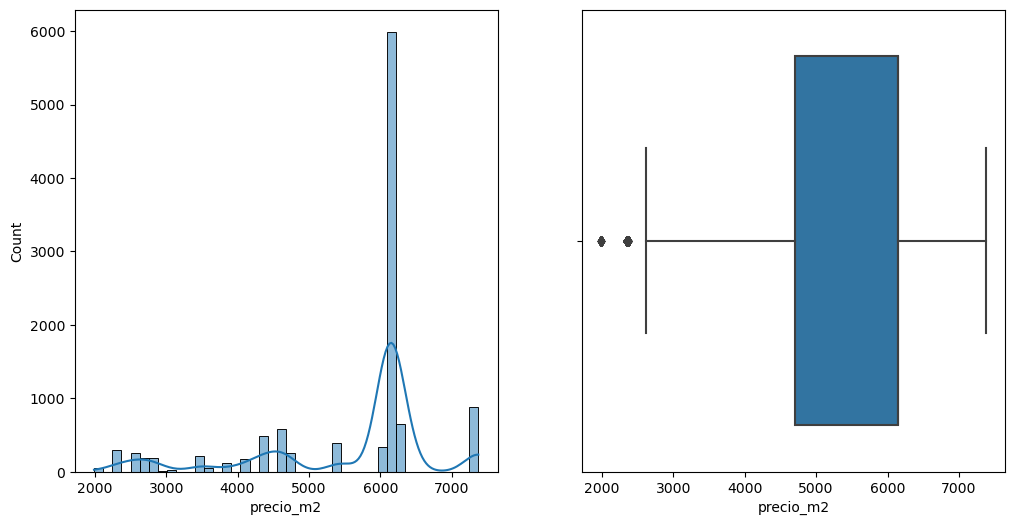

Los estadísticos son 
 count    11098.000000
mean      5600.814741
std       1252.662253
min       1988.000000
25%       4700.000000
50%       6144.000000
75%       6144.000000
max       7374.000000
Name: precio_m2, dtype: float64
La mediana es 6144.0
La moda es 6144
El IQR es de 1444.0
El CV es de 22.37

Para la variable price_accommodates


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


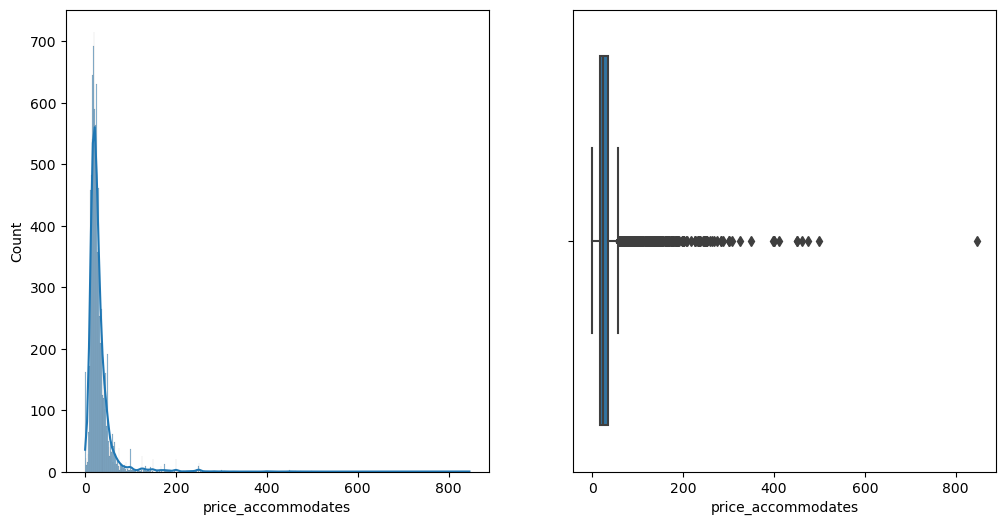

Los estadísticos son 
 count    11098.000000
mean        30.285730
std         30.299793
min          0.069625
25%         17.212500
50%         23.500000
75%         33.333333
max        846.000000
Name: price_accommodates, dtype: float64
La mediana es 23.5
La moda es 25.0
El IQR es de 16.120833333333344
El CV es de 100.05

Para la variable price_bedrooms


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


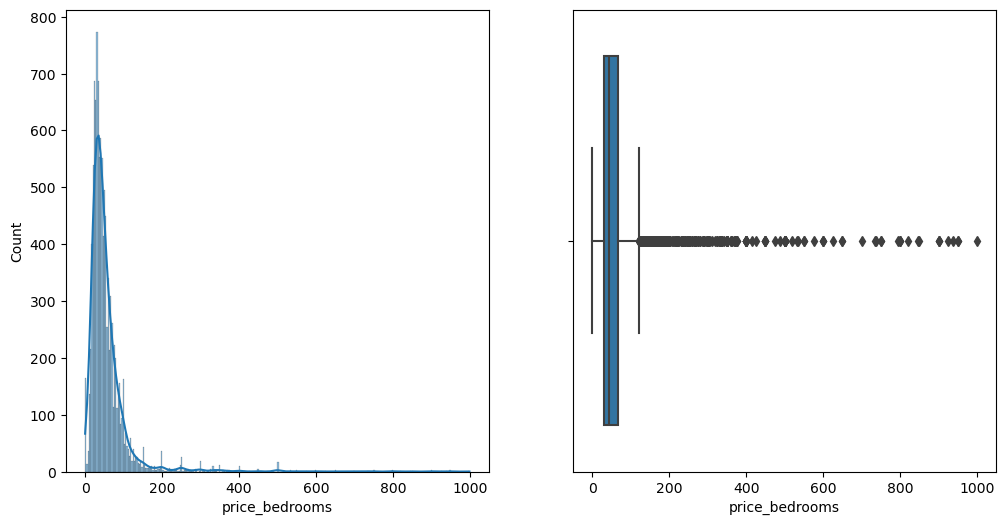

Los estadísticos son 
 count    1.109800e+04
mean              inf
std               NaN
min      1.012727e-01
25%      2.900000e+01
50%      4.300000e+01
75%      6.600000e+01
max               inf
Name: price_bedrooms, dtype: float64
La mediana es 43.0
La moda es 50.0
El IQR es de 37.0
El CV es de nan

Para la variable antiguedad_host


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


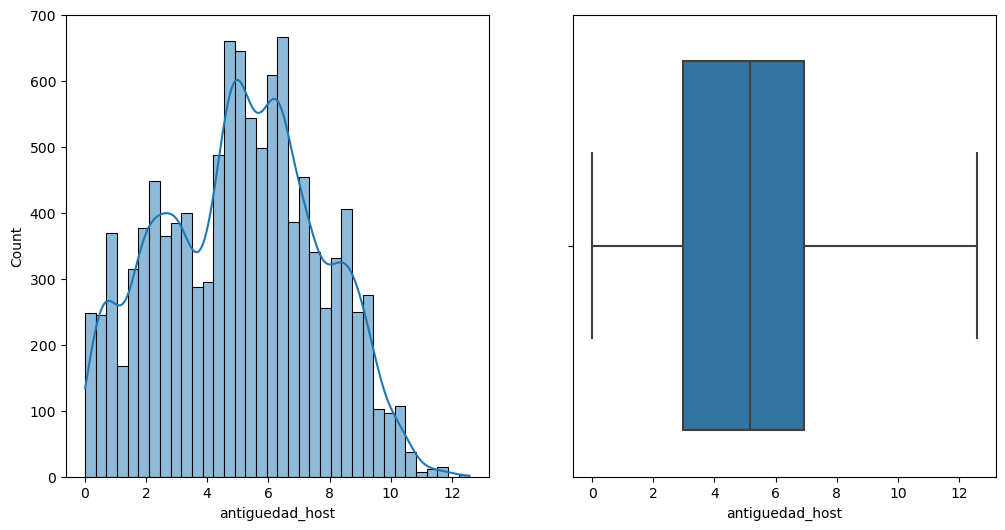

Los estadísticos son 
 count    11086.000000
mean         5.070666
std          2.572359
min          0.010000
25%          2.980000
50%          5.160000
75%          6.920000
max         12.570000
Name: antiguedad_host, dtype: float64
La mediana es 5.16
La moda es 0.78
El IQR es de 3.94
El CV es de 50.73

Para la variable sup_m2_est


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


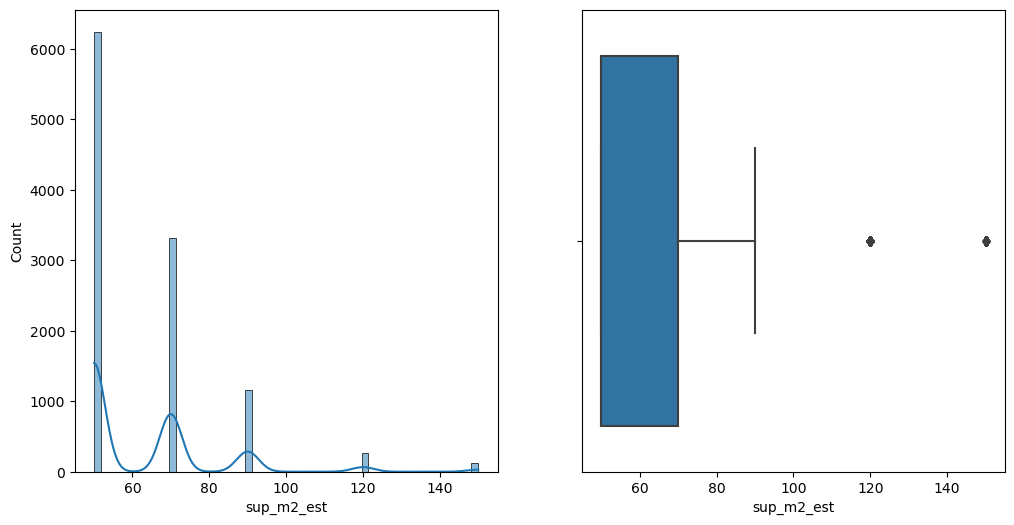

Los estadísticos son 
 count    11098.000000
mean        62.878897
std         18.563145
min         50.000000
25%         50.000000
50%         50.000000
75%         70.000000
max        150.000000
Name: sup_m2_est, dtype: float64
La mediana es 50.0
La moda es 50
El IQR es de 20.0
El CV es de 29.52

Para la variable precio_est


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


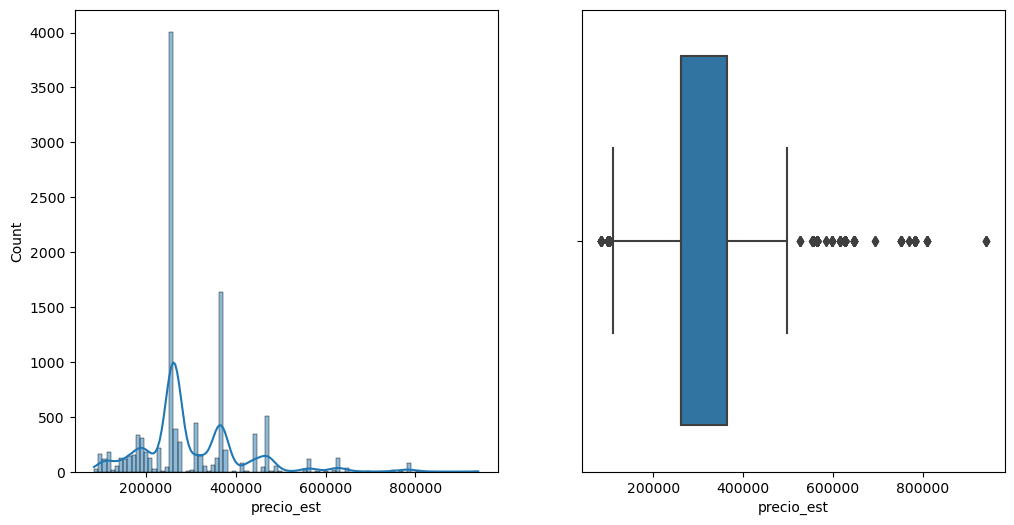

Los estadísticos son 
 count     11098.000000
mean     298523.633447
std      111261.309835
min       84490.000000
25%      261120.000000
50%      261120.000000
75%      365568.000000
max      940185.000000
Name: precio_est, dtype: float64
La mediana es 261120.0
La moda es 261120.0
El IQR es de 104448.0
El CV es de 37.27

Para la variable price_x_sup


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


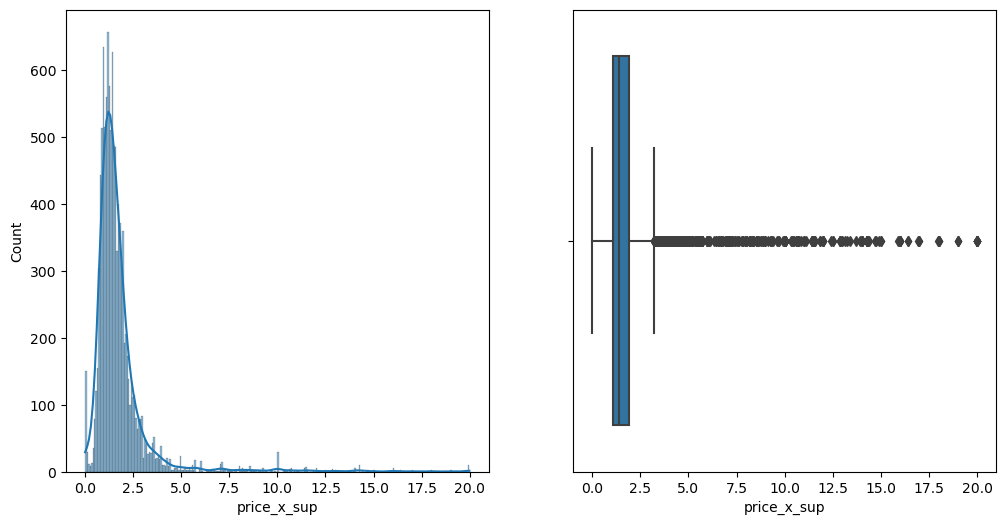

Los estadísticos son 
 count    11098.000000
mean         1.768212
std          1.647704
min          0.007427
25%          1.060000
50%          1.400000
75%          1.920000
max         19.980000
Name: price_x_sup, dtype: float64
La mediana es 1.4
La moda es 1.0
El IQR es de 0.8599999999999999
El CV es de 93.18



In [37]:
estadistica_descriptiva_numericas(df_home)

### Revisión de variables con datos fuera de lo normal

In [38]:
# variable:price
df_home[df_home['price']> 121].shape

(2751, 37)

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


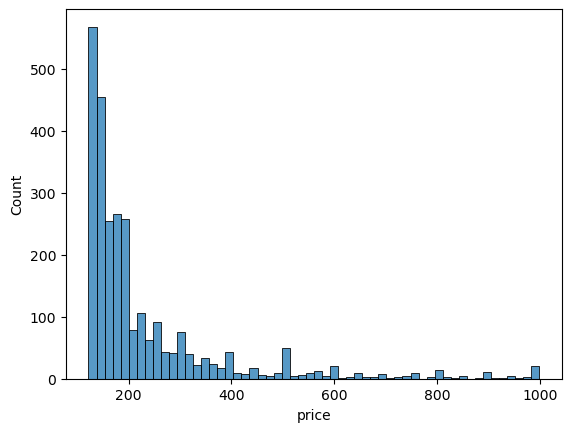

In [39]:
# Por encima del 75%
df_prov=df_home[df_home['price']> 121]
sns.histplot(x = "price", data = df_prov);

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


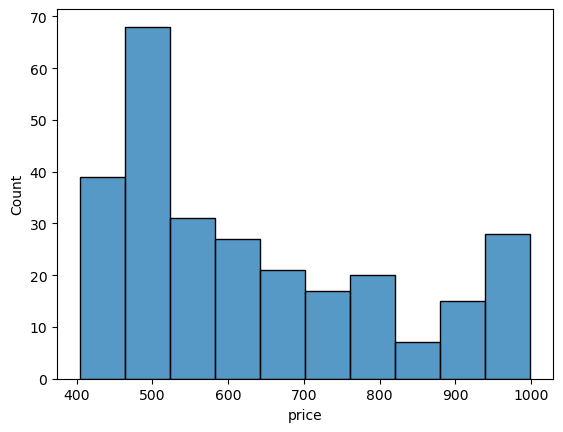

In [40]:
# Por encima de 400
df_prov=df_home[df_home['price']> 400]
sns.histplot(x = "price", data = df_prov);

In [41]:
df_home[df_home['price']< 30].shape

(266, 37)

c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


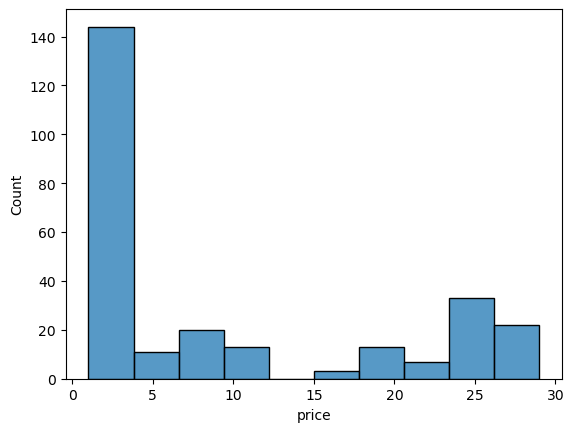

In [42]:
df_prov = df_home[df_home['price']< 30]
sns.histplot(x = "price", data = df_prov);


In [43]:
# maximum_nights
df_home[df_home["maximum_nights"] > 1125]

,id,host_id,host_is_superhost,name,host_name,host_since,amenities,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,accommodates_disc,propietarios_disc,price_accommodates,price_bedrooms,antiguedad_host,champion,segmentacion_mercado,sup_m2_est,precio_est,price_x_sup
181,578731,2847013,f,"CENTRIC, QUIET, BRIGHT APARTMENT.",Santiago,2012-07-06,"[""Shampoo"", ""First aid kit"", ""Pack \u2019n Pla...",5.0,Universidad,Centro,...,03familias,02_pequeños_inversores,16.00000,26.666667,9.18,False,mayoria_mercado,70,365568.0,1.142857
394,1101760,2847013,f,GREAT ATTIC-BARRIO DE LAS LETRA,Santiago,2012-07-06,"[""Shampoo"", ""First aid kit"", ""Pack \u2019n Pla...",5.0,Cortes,Centro,...,03familias,02_pequeños_inversores,2.49975,4.999500,9.18,False,mayoria_mercado,50,261120.0,0.199980
421,1206122,4967875,f,MADRID CENTER WIFI-PARKING+TERRACE,Jacqueline - Apartamentos,2013-02-04,"[""Shampoo"", ""Pack \u2019n Play/travel crib"", ""...",10.0,Ibiza,Retiro,...,03familias,03_grandes_inversores,24.80000,41.333333,8.60,False,mayoria_mercado,50,231497.5,2.480000
654,2380554,4967875,f,CENTER MADRID WI-FI-PARKING 4º,Jacqueline - Apartamentos,2013-02-04,"[""gel de ba\u00f1o body soap"", ""Shampoo"", ""Pac...",10.0,Ibiza,Retiro,...,03familias,03_grandes_inversores,37.00000,74.000000,8.60,False,mayoria_mercado,50,231497.5,2.960000
1016,4600543,23844357,f,"Beautiful, bohemian large apartment in La Latina!",Cynthia,2014-11-17,"[""Wifi"", ""Shampoo"", ""Iron"", ""Smoke alarm"", ""Fi...",1.0,Palacio,Centro,...,02parejas,01_particular,24.00000,48.000000,6.82,False,mayoria_mercado,50,261120.0,0.960000
1520,7100128,29977184,f,Estudio en Matute 11 Suites,Matute,2015-03-25,"[""Wifi"", ""Shampoo"", ""TV with standard cable"", ...",9.0,Cortes,Centro,...,02parejas,01_particular,95.00000,190.000000,6.47,False,mayoria_mercado,50,261120.0,3.800000


## Análsis univariable df_private

In [44]:
df_private.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7390 entries, 0 to 18905
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              7390 non-null   int64         
 1   host_id                         7390 non-null   int64         
 2   host_is_superhost               7390 non-null   object        
 3   name                            7390 non-null   object        
 4   host_name                       7376 non-null   object        
 5   host_since                      7376 non-null   datetime64[ns]
 6   amenities                       7390 non-null   object        
 7   host_listings_count             7376 non-null   float64       
 8   neighbourhood_cleansed          7390 non-null   object        
 9   neighbourhood_group_cleansed    7390 non-null   object        
 10  latitude                        7390 non-null   float64       
 11  longitud

### Variables categóricas


#### `host_is_superhost`

La moda de host_is_superhost es: f con un valor de 6432 (87.04%)
La frecuencia absoluta mínima es de la variable t con un valor de 958 (12.96%)

host_is_superhost
f    87.036536
t    12.963464
Name: proportion, dtype: float64


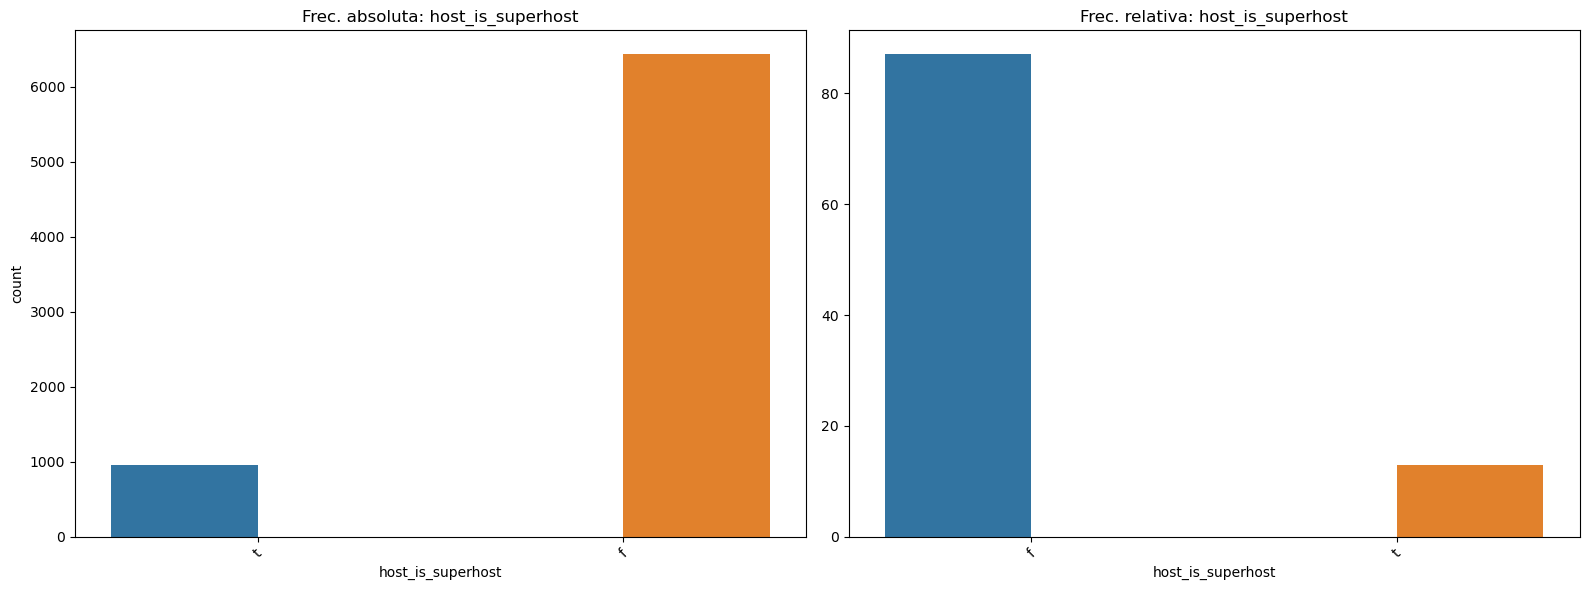

In [45]:
graficos_categoricas_individual(df_private,'host_is_superhost')

##### Observación:
Tan solo un 12% es superhost en la oferta de habitaciones privadas

#### `name `

In [46]:
df_private['name'].value_counts()

name
Habitación privada                                          12
Habitación                                                  12
Habitación en el centro de Madrid                           10
Habitación en Madrid                                        10
Room for student or worker girls until 35 year old           8
                                                            ..
Habitación nueva y limpia en el centro Madrid.11             1
Habitacion individual muy limpia y luminosa.                 1
Habitación muy limpia y nueva centro de Madrid.              1
habitacion Madrid Rio                                        1
Fashioned Private Room in 12-Bedroom Unit - los 3 months     1
Name: count, Length: 7066, dtype: int64

No se puede sacar gran cosa de esto.

#### `host_name`

In [47]:
df_private['host_name'].value_counts()

host_name
Carlos         97
Maria          95
Svetlana       87
Daniel         80
Jorge          80
               ..
Aspiritou       1
Clara María     1
Gosmanp         1
Juancho         1
Nubia           1
Name: count, Length: 2181, dtype: int64

##### Observación: 
Algunos nombres coinciden que son los pisos propiedad de una sola empresa o bien que los gestiona.

#### 'amenities'

In [48]:
df_private['amenities'].value_counts()

amenities
["Wifi", "Hot water", "Long term stays allowed", "Heating", "Kitchen"]                                                                                                                                                                                                                                                                                                                                                                                                                                            88
["Long term stays allowed"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [49]:
df_private['amenities'].unique()

array(['["Wifi", "Shampoo", "Extra pillows and blankets", "Pocket wifi", "Dishes and silverware", "Cooking basics", "Iron", "Essentials", "Bed linens", "Air conditioning", "Elevator", "Hangers", "Hot water", "Long term stays allowed", "Washer", "Heating", "Hair dryer", "Kitchen"]',
       '["Free parking on premises", "Shampoo", "Pocket wifi", "First aid kit", "Long term stays allowed", "Wifi", "Extra pillows and blankets", "Air conditioning", "Dedicated workspace", "Hangers", "Washer", "Cooking basics", "Dishes and silverware", "Iron", "Coffee maker", "Elevator", "Hot water", "Hair dryer", "Kitchen", "Lock on bedroom door", "Refrigerator", "Microwave", "Bed linens", "TV", "Fire extinguisher", "Oven", "Heating", "Essentials"]',
       '["Wifi", "Shampoo", "Dishes and silverware", "Bed linens", "Elevator", "Patio or balcony", "Hangers", "Hot water", "Host greets you", "Long term stays allowed", "Heating", "Essentials", "Refrigerator", "Hair dryer"]',
       ...,
       '["Wifi", "Iron",

Demasiado texto como para saca conclusiones y similitudes.

#### `neighbourhood_cleansed`   

In [50]:
df_private['neighbourhood_cleansed'].nunique()

128

In [51]:
df_private['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Embajadores      561
Universidad      450
Palacio          416
Sol              309
Justicia         254
                ... 
Fuentelareina      1
El Pardo           1
Valdemarín         1
Horcajo            1
Atalaya            1
Name: count, Length: 128, dtype: int64

In [52]:
df_private['neighbourhood_cleansed'].value_counts(normalize=True).round(3)*100

neighbourhood_cleansed
Embajadores      7.6
Universidad      6.1
Palacio          5.6
Sol              4.2
Justicia         3.4
                ... 
Fuentelareina    0.0
El Pardo         0.0
Valdemarín       0.0
Horcajo          0.0
Atalaya          0.0
Name: proportion, Length: 128, dtype: float64

In [53]:
df_private['neighbourhood_cleansed'].unique()


array(['Hispanoamérica', 'Cármenes', 'Legazpi', 'Embajadores', 'Palacio',
       'Justicia', 'Universidad', 'Palomeras Bajas', 'Pueblo Nuevo',
       'Los Angeles', 'Piovera', 'Canillas', 'Cortes', 'Arapiles',
       'Trafalgar', 'Opañel', 'Sol', 'Ciudad Jardín', 'Acacias',
       'Fuente del Berro', 'Entrevías', 'Lista', 'Cuatro Caminos',
       'Lucero', 'Almagro', 'Comillas', 'La Paz', 'Rosas', 'Arcos',
       'Numancia', 'Pacífico', 'Palos de Moguer', 'Ibiza',
       'Casco Histórico de Vallecas', 'Puerta del Angel', 'San Fermín',
       'Berruguete', 'Aravaca', 'San Diego', 'Prosperidad', 'Costillares',
       'Delicias', 'Bellas Vistas', 'Alameda de Osuna', 'Timón',
       'Salvador', 'Jerónimos', 'Campamento', 'Concepción',
       'Palomeras Sureste', 'Valdefuentes', 'Gaztambide',
       'Ciudad Universitaria', 'Recoletos', 'Rios Rosas', 'Peñagrande',
       'Goya', 'Los Rosales', 'El Viso', 'Atocha', 'Chopera', 'Moscardó',
       'Ventas', 'Portazgo', 'Castilla', 'Almenara', 'M

##### Observaciones:
Los que más anuncios tienen son de (valor en %):
- Embajadores      7.6
- Universidad      6.1
- Palacio          5.6
- Sol              4.2
- Justicia         3.4

Los que menos anuncios tienen son de (valor en %):
- Fuentelareina    0.0
- El Pardo         0.0
- Valdemarín       0.0
- Horcajo          0.0
- Atalaya          0.0

#### `neighbourhood_group_cleansed`

In [54]:
df_private['neighbourhood_group_cleansed'].nunique()

21

In [55]:
df_private['neighbourhood_group_cleansed'].value_counts()

neighbourhood_group_cleansed
Centro                   2181
Arganzuela                481
Chamberí                  475
Carabanchel               413
Ciudad Lineal             380
Salamanca                 367
Latina                    356
Puente de Vallecas        329
Tetuán                    328
San Blas - Canillejas     322
Moncloa - Aravaca         280
Retiro                    257
Chamartín                 211
Hortaleza                 196
Usera                     176
Fuencarral - El Pardo     170
Villaverde                131
Barajas                   103
Moratalaz                 103
Villa de Vallecas          74
Vicálvaro                  57
Name: count, dtype: int64

In [56]:
df_private['neighbourhood_group_cleansed'].value_counts(normalize=True).round(3)*100

neighbourhood_group_cleansed
Centro                   29.5
Arganzuela                6.5
Chamberí                  6.4
Carabanchel               5.6
Ciudad Lineal             5.1
Salamanca                 5.0
Latina                    4.8
Puente de Vallecas        4.5
Tetuán                    4.4
San Blas - Canillejas     4.4
Moncloa - Aravaca         3.8
Retiro                    3.5
Chamartín                 2.9
Hortaleza                 2.7
Usera                     2.4
Fuencarral - El Pardo     2.3
Villaverde                1.8
Barajas                   1.4
Moratalaz                 1.4
Villa de Vallecas         1.0
Vicálvaro                 0.8
Name: proportion, dtype: float64

##### Observaciones:
Los 5 distritos con mayor número de anuncios son:
- Centro                   29.5
- Arganzuela                6.5
- Chamberí                  6.4
- Carabanchel               5.6
- Ciudad Lineal             5.1

Los 5 distritos con menor número de anuncios son:
- Villaverde                1.8
- Barajas                   1.4
- Moratalaz                 1.4
- Villa de Vallecas         1.0
- Vicálvaro                 0.8

#### `property_type`

In [57]:
df_private['property_type'].nunique()

29

In [58]:
df_private['property_type'].unique()

array(['Private room in rental unit', 'Private room in residential home',
       'Private room in guest suite', 'Private room in chalet',
       'Private room in condominium (condo)',
       'Private room in bed and breakfast', 'Private room in townhouse',
       'Private room in casa particular', 'Private room in loft',
       'Private room', 'Private room in guesthouse',
       'Private room in serviced apartment', 'Private room in hostel',
       'Private room in floor', 'Room in hotel', 'Room in boutique hotel',
       'Private room in hut', 'Private room in bungalow',
       'Private room in villa', 'Private room in tiny house',
       'Private room in farm stay', 'Private room in barn',
       'Private room in dome house', 'Private room in earth house',
       'Private room in pension', 'Private room in igloo',
       'Private room in cottage', 'Room in aparthotel',
       'Private room in ryokan'], dtype=object)

In [59]:
df_private['property_type'].value_counts()

property_type
Private room in rental unit            5311
Private room in residential home        816
Private room in condominium (condo)     343
Private room in hostel                  210
Private room in bed and breakfast       106
Private room in casa particular         102
Private room in serviced apartment       84
Room in boutique hotel                   63
Private room in guest suite              58
Private room in townhouse                51
Private room in chalet                   44
Room in hotel                            41
Private room in guesthouse               41
Private room in loft                     40
Private room                             23
Private room in tiny house               12
Private room in floor                    12
Private room in villa                    10
Private room in earth house               5
Private room in dome house                4
Room in aparthotel                        3
Private room in bungalow                  2
Private room in ba

In [60]:
df_private['property_type'].value_counts(normalize=True).round(3)*100

property_type
Private room in rental unit            71.9
Private room in residential home       11.0
Private room in condominium (condo)     4.6
Private room in hostel                  2.8
Private room in bed and breakfast       1.4
Private room in casa particular         1.4
Private room in serviced apartment      1.1
Room in boutique hotel                  0.9
Private room in guest suite             0.8
Private room in townhouse               0.7
Private room in chalet                  0.6
Room in hotel                           0.6
Private room in guesthouse              0.6
Private room in loft                    0.5
Private room                            0.3
Private room in tiny house              0.2
Private room in floor                   0.2
Private room in villa                   0.1
Private room in earth house             0.1
Private room in dome house              0.1
Room in aparthotel                      0.0
Private room in bungalow                0.0
Private room in ba

##### Observaciones:
Del tipo de propiedad (dentro de la variable 'Private room'), en %:
- Private room in rental unit            71.9
- Private room in residential home       11.0
- Private room in condominium (condo)     4.6
- Private room in hostel                  2.8
- Private room in bed and breakfast       1.4


#### `price_disc`

In [61]:
df_private['price_disc'].value_counts()

price_disc
01muy_bajo    3485
02bajo        2577
05muy_alto     681
04alto         336
03medio        311
Name: count, dtype: int64

La moda de price_disc es: 01muy_bajo con un valor de 3485 (47.16%)
La frecuencia absoluta mínima es de la variable 03medio con un valor de 311 (4.21%)

price_disc
01muy_bajo    47.158322
02bajo        34.871448
05muy_alto     9.215156
04alto         4.546685
03medio        4.208390
Name: proportion, dtype: float64


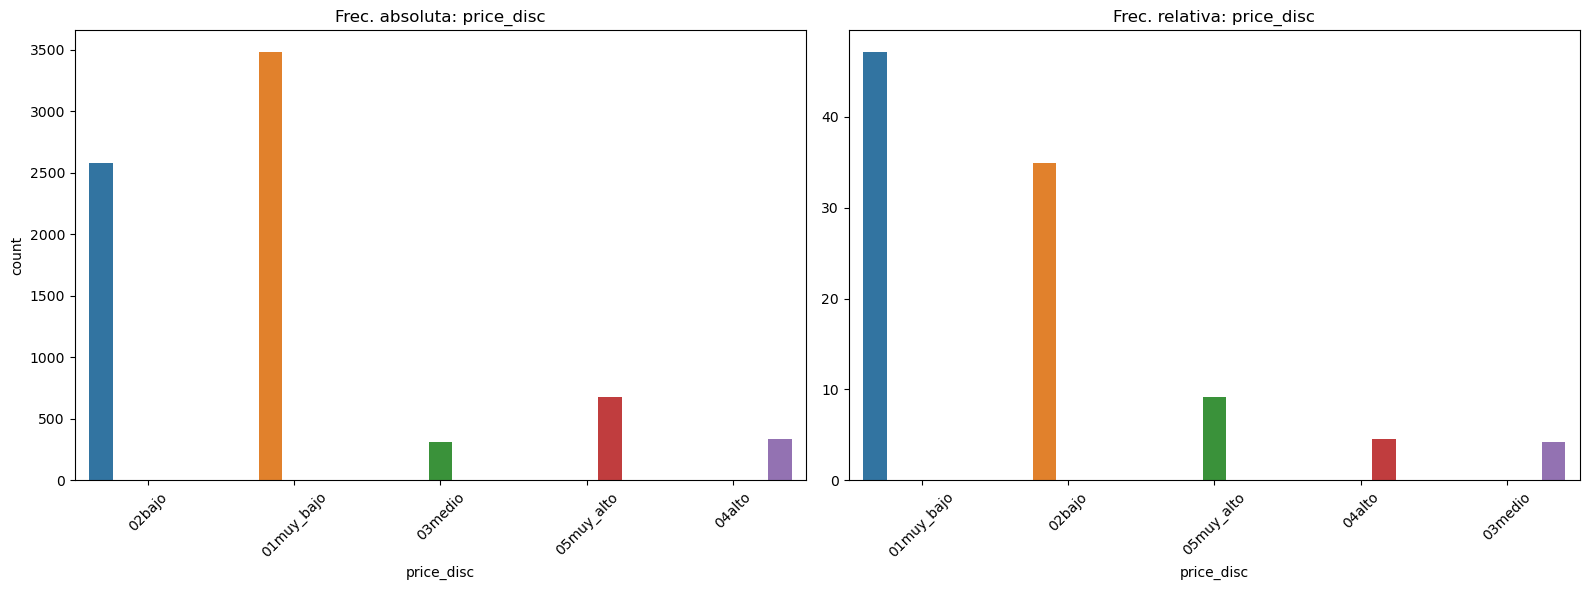

In [62]:
graficos_categoricas_individual(df_private,'price_disc')

##### Observaciones:
- El mayor porcentaje tiene un valor muy bajo (47,15%), es decir, por debajo de 30€, seguido de precio bajo entre 30 y 60€ con un 34,8%.
- El resto es muy residual

#### `accommodates_disc`

In [63]:
df_private['accommodates_disc'].value_counts()

accommodates_disc
02parejas       3681
01individual    3046
03familias       606
04grupos          57
Name: count, dtype: int64

La moda de accommodates_disc es: 02parejas con un valor de 3681 (49.81%)
La frecuencia absoluta mínima es de la variable 04grupos con un valor de 57 (0.77%)

accommodates_disc
02parejas       49.810555
01individual    41.217862
03familias       8.200271
04grupos         0.771313
Name: proportion, dtype: float64


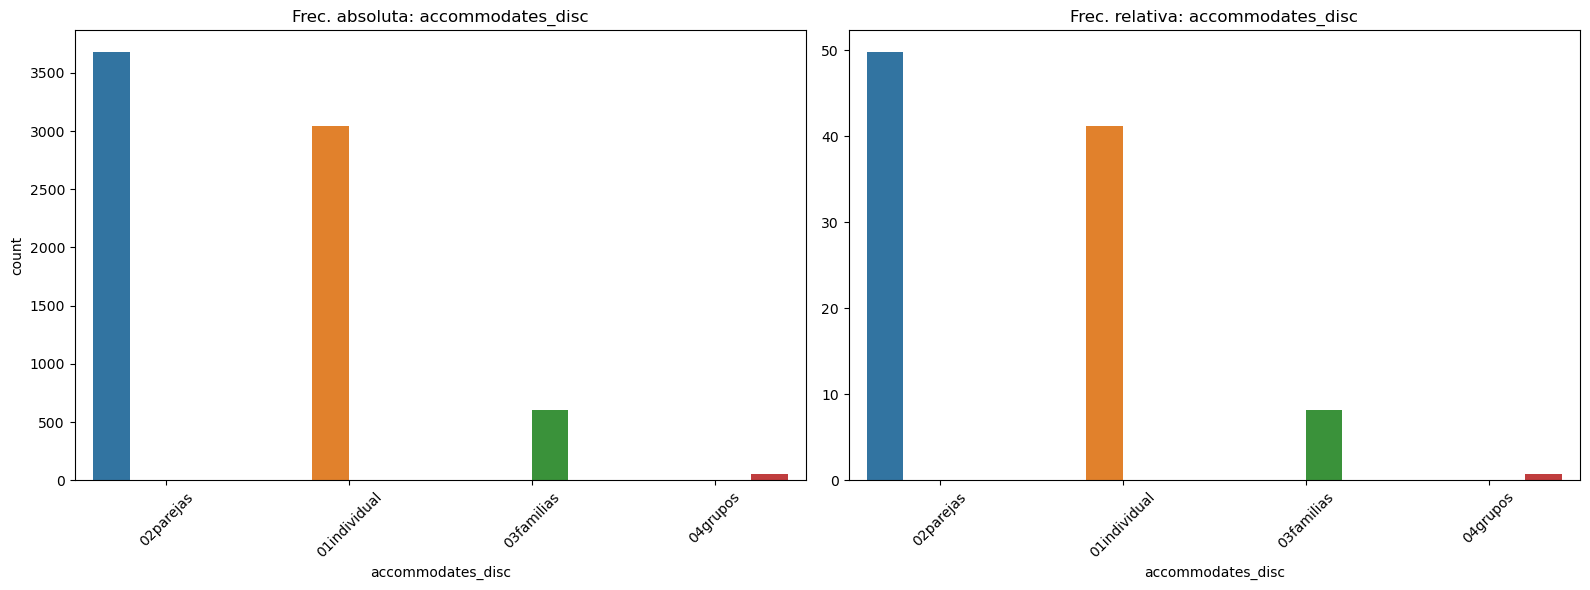

In [64]:
graficos_categoricas_individual(df_private,'accommodates_disc')

##### Observaciones:
- La mayor parte de la oferta de pisos va encaminada a 1- 2 personas (49% y 41%) respectivamente.
- Algo lógico teniendo en cuenta que son solo habitaciones.
    

#### `propietarios_disc`

In [65]:
df_private['propietarios_disc'].value_counts()

propietarios_disc
01_particular             3868
02_pequeños_inversores    2356
03_grandes_inversores      585
04_grandes_empresas        581
Name: count, dtype: int64

La moda de propietarios_disc es: 01_particular con un valor de 3868 (52.34%)
La frecuencia absoluta mínima es de la variable 04_grandes_empresas con un valor de 581 (7.86%)

propietarios_disc
01_particular             52.341001
02_pequeños_inversores    31.880920
03_grandes_inversores      7.916103
04_grandes_empresas        7.861976
Name: proportion, dtype: float64


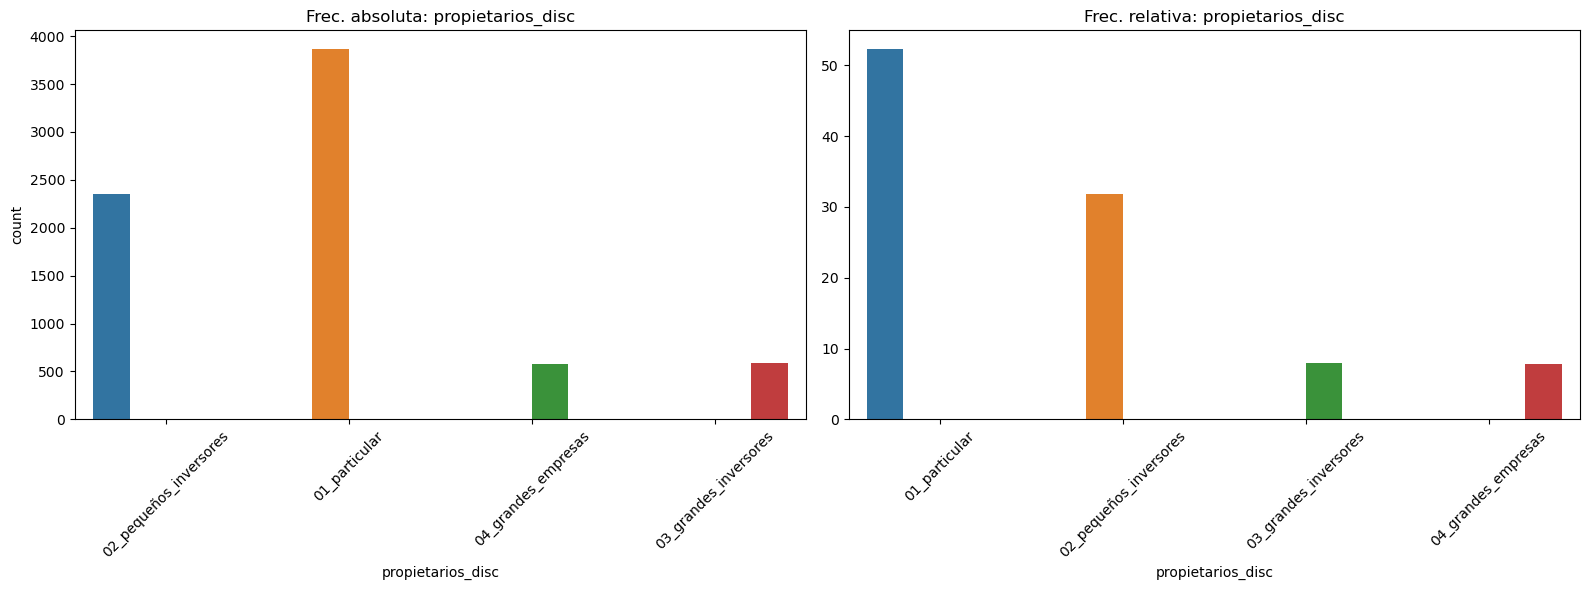

In [66]:
graficos_categoricas_individual(df_private,'propietarios_disc')

##### Observaciones:
- La mayor parte de la oferta de habitaciones privada proviene de propietarios individuales (52,3%) seguido de pequeños inversores (31,8%).
- Siendo el resto muy pequeño.

### `segmentacion_mercado`

In [67]:
df_private['segmentacion_mercado'].value_counts()

segmentacion_mercado
mayoria_mercado         7037
lujo                     311
oportunismo_champion      42
Name: count, dtype: int64

In [68]:
df_private['segmentacion_mercado'].value_counts(normalize=True).round(3)*100

segmentacion_mercado
mayoria_mercado         95.2
lujo                     4.2
oportunismo_champion     0.6
Name: proportion, dtype: float64

La moda de segmentacion_mercado es: mayoria_mercado con un valor de 7037 (95.22%)
La frecuencia absoluta mínima es de la variable oportunismo_champion con un valor de 42 (0.57%)

segmentacion_mercado
mayoria_mercado         95.223275
lujo                     4.208390
oportunismo_champion     0.568336
Name: proportion, dtype: float64


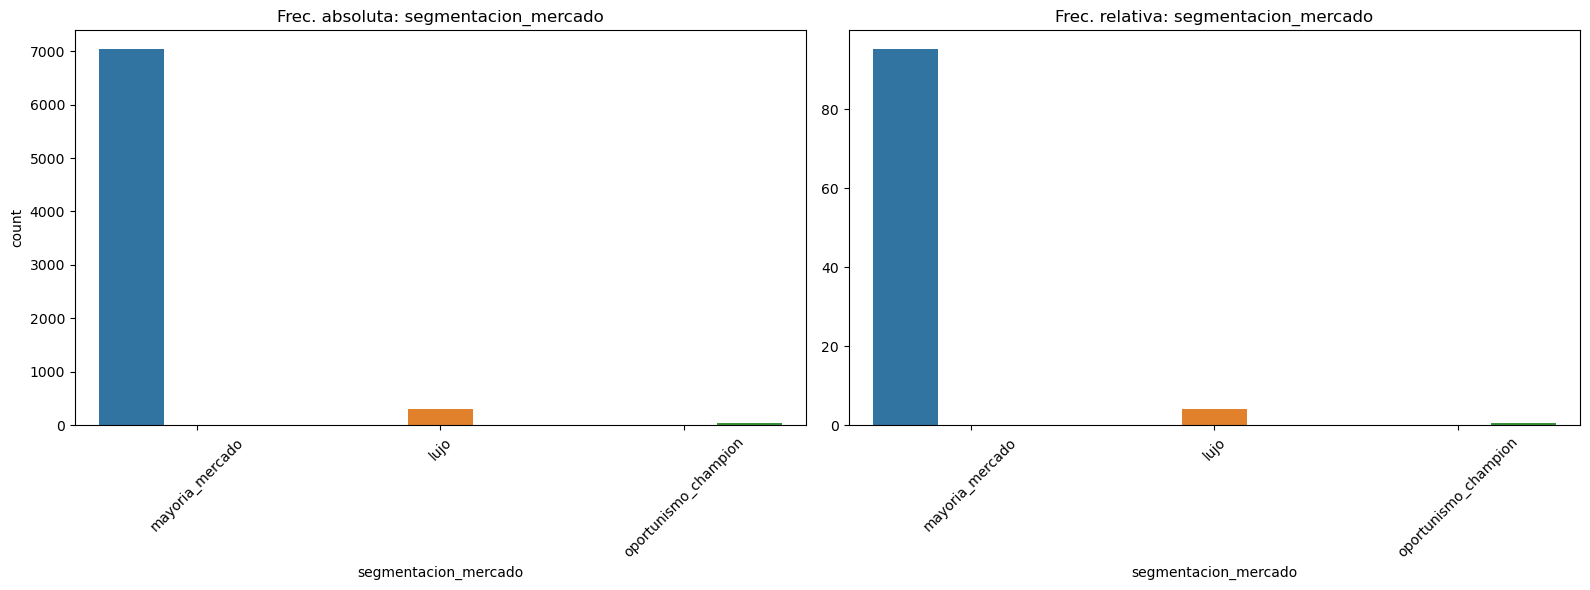

In [69]:
graficos_categoricas_individual(df_private,'segmentacion_mercado')

### Variable numérica

#### Primer análisis

In [70]:
lista = variables_numericas(df_private)
df_private[lista].describe().T

,count,mean,std,min,25%,50%,75%,max
host_listings_count,7376.0,3.793926,9.761833,0.00,1.0000,1.00,3.0000,115.00
accommodates,7390.0,1.753992,0.929855,1.00,1.0000,2.00,2.0000,16.00
bedrooms,7390.0,1.116644,0.599482,1.00,1.0000,1.00,1.0000,18.00
beds,7390.0,1.209066,0.843402,0.00,1.0000,1.00,1.0000,24.00
price,7390.0,66.648184,115.854836,1.00,23.0000,33.00,50.0000,999.00
minimum_nights,7390.0,7.881326,41.863570,1.00,1.0000,1.00,3.0000,1125.00
maximum_nights,7390.0,791.550474,11752.915948,1.00,30.0000,1125.00,1125.0000,1000000.00
number_of_reviews,7390.0,20.493640,52.089091,0.00,0.0000,2.00,14.0000,648.00
review_scores_rating,4705.0,4.512561,0.945072,0.00,4.5000,4.80,5.0000,5.00
calculated_host_listings_count,7390.0,5.097158,12.222263,1.00,1.0000,1.00,3.0000,87.00


Para la variable host_listings_count


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


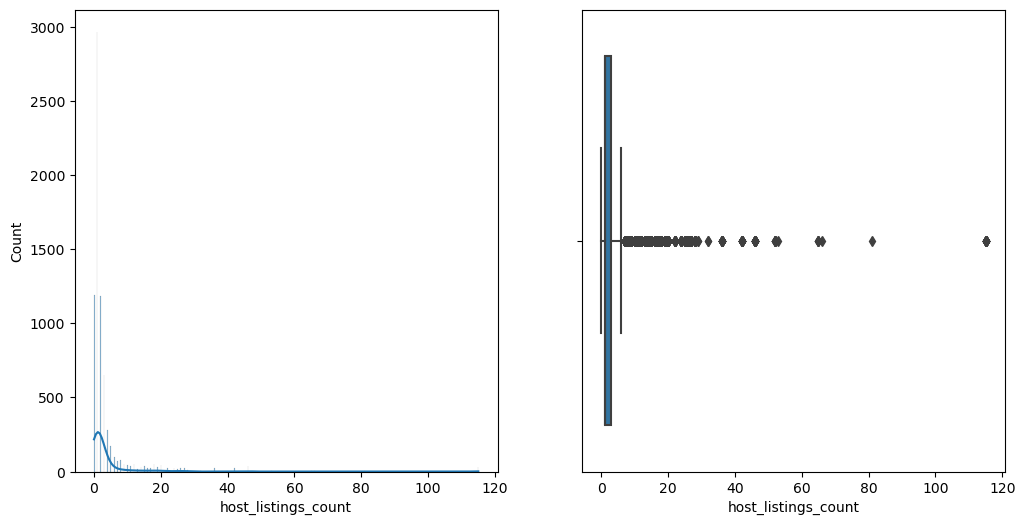

Los estadísticos son 
 count    7376.000000
mean        3.793926
std         9.761833
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       115.000000
Name: host_listings_count, dtype: float64
La mediana es 1.0
La moda es 1.0
El IQR es de 2.0
El CV es de 257.3

Para la variable accommodates


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


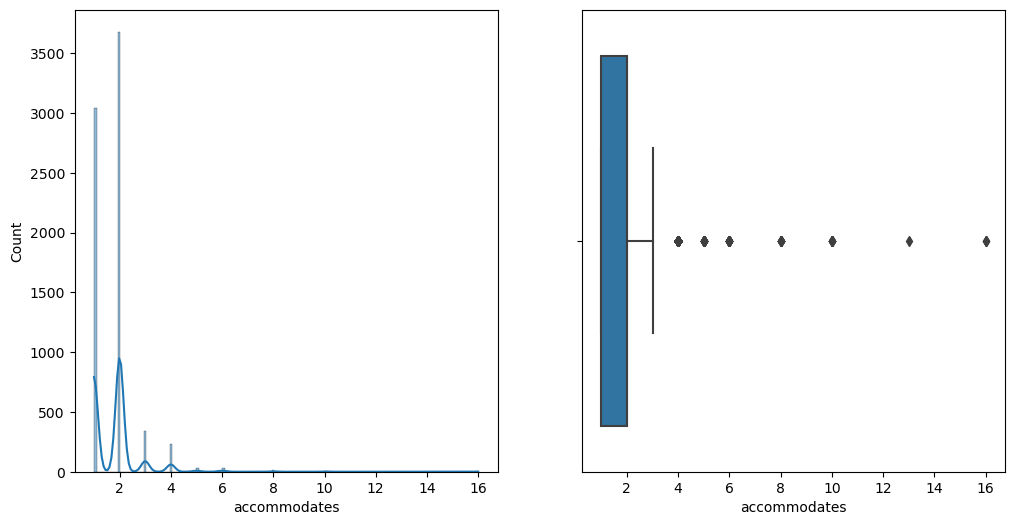

Los estadísticos son 
 count    7390.000000
mean        1.753992
std         0.929855
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        16.000000
Name: accommodates, dtype: float64
La mediana es 2.0
La moda es 2
El IQR es de 1.0
El CV es de 53.01

Para la variable bedrooms


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


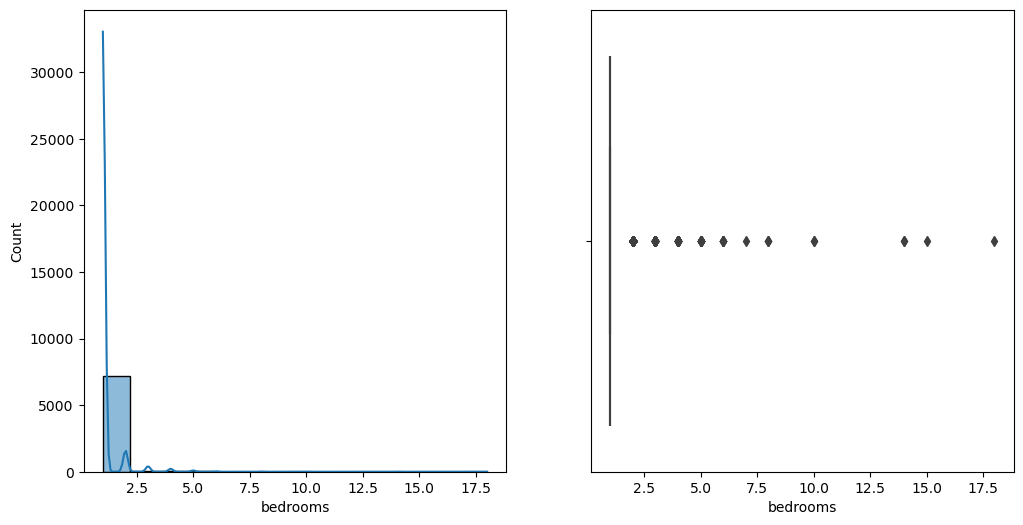

Los estadísticos son 
 count    7390.000000
mean        1.116644
std         0.599482
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        18.000000
Name: bedrooms, dtype: float64
La mediana es 1.0
La moda es 1
El IQR es de 0.0
El CV es de 53.69

Para la variable beds


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


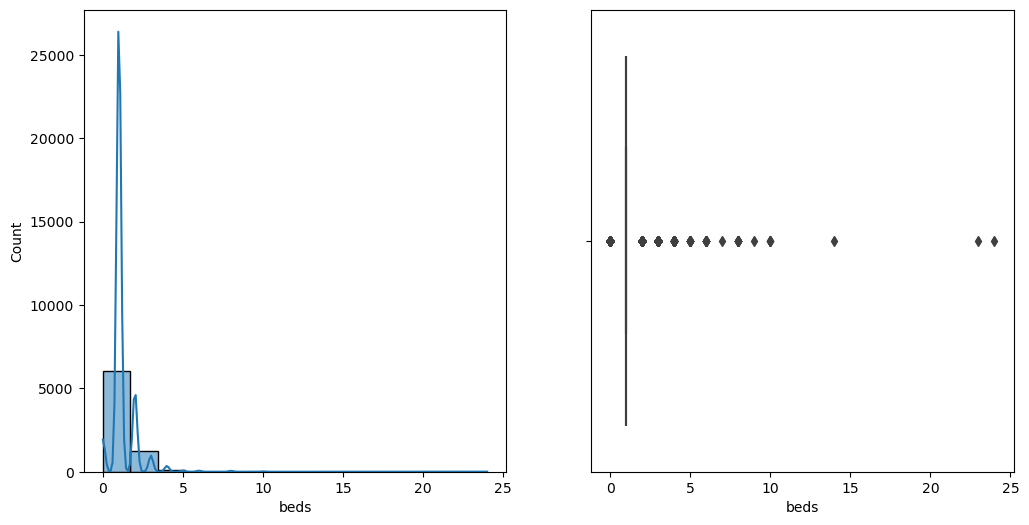

Los estadísticos son 
 count    7390.000000
mean        1.209066
std         0.843402
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        24.000000
Name: beds, dtype: float64
La mediana es 1.0
La moda es 1
El IQR es de 0.0
El CV es de 69.76

Para la variable price


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


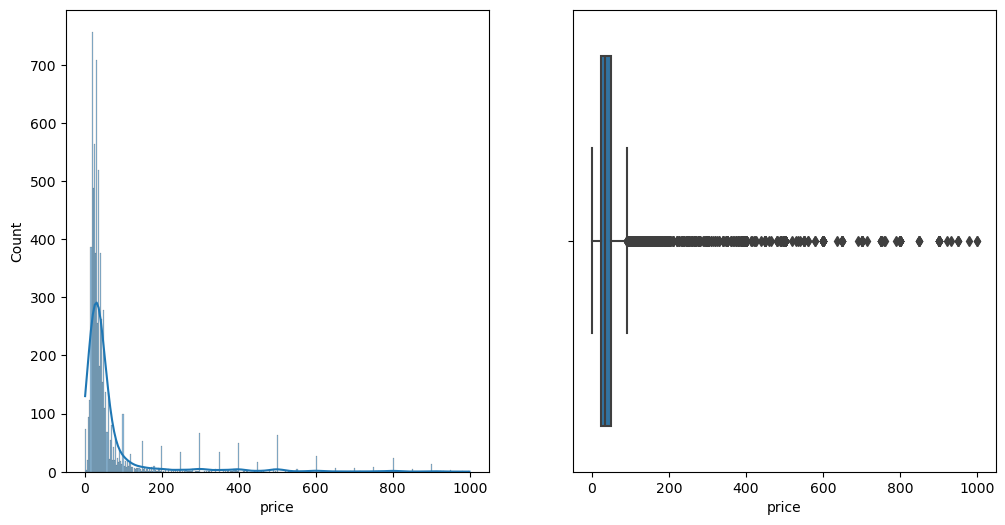

Los estadísticos son 
 count    7390.000000
mean       66.648184
std       115.854836
min         1.000000
25%        23.000000
50%        33.000000
75%        50.000000
max       999.000000
Name: price, dtype: float64
La mediana es 33.0
La moda es 25.0
El IQR es de 27.0
El CV es de 173.83

Para la variable minimum_nights


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


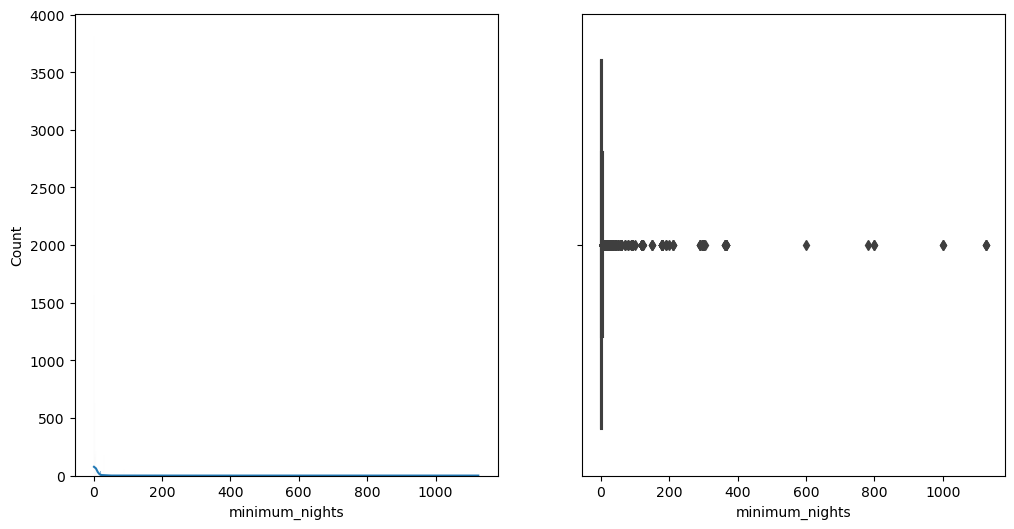

Los estadísticos son 
 count    7390.000000
mean        7.881326
std        41.863570
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1125.000000
Name: minimum_nights, dtype: float64
La mediana es 1.0
La moda es 1
El IQR es de 2.0
El CV es de 531.17

Para la variable maximum_nights


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


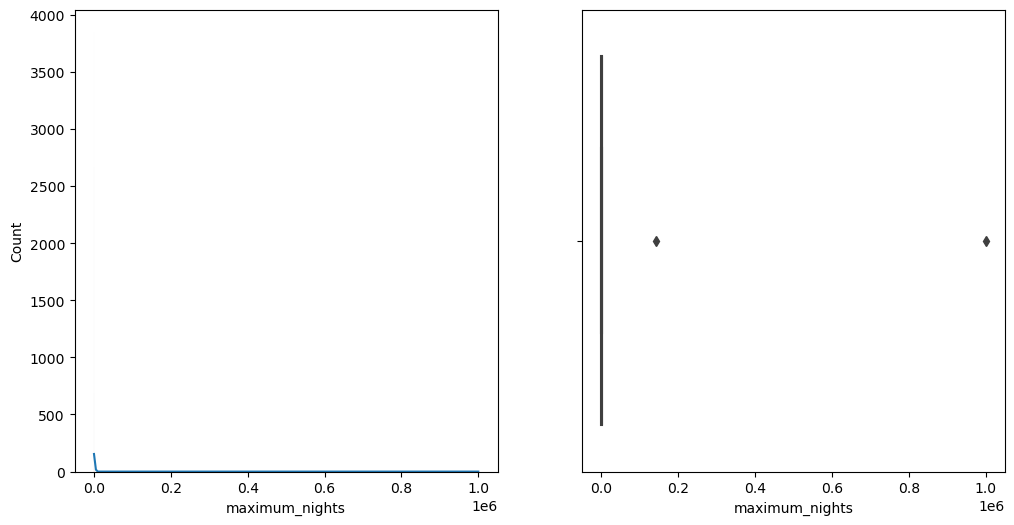

Los estadísticos son 
 count       7390.000000
mean         791.550474
std        11752.915948
min            1.000000
25%           30.000000
50%         1125.000000
75%         1125.000000
max      1000000.000000
Name: maximum_nights, dtype: float64
La mediana es 1125.0
La moda es 1125
El IQR es de 1095.0
El CV es de 1484.8

Para la variable number_of_reviews


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


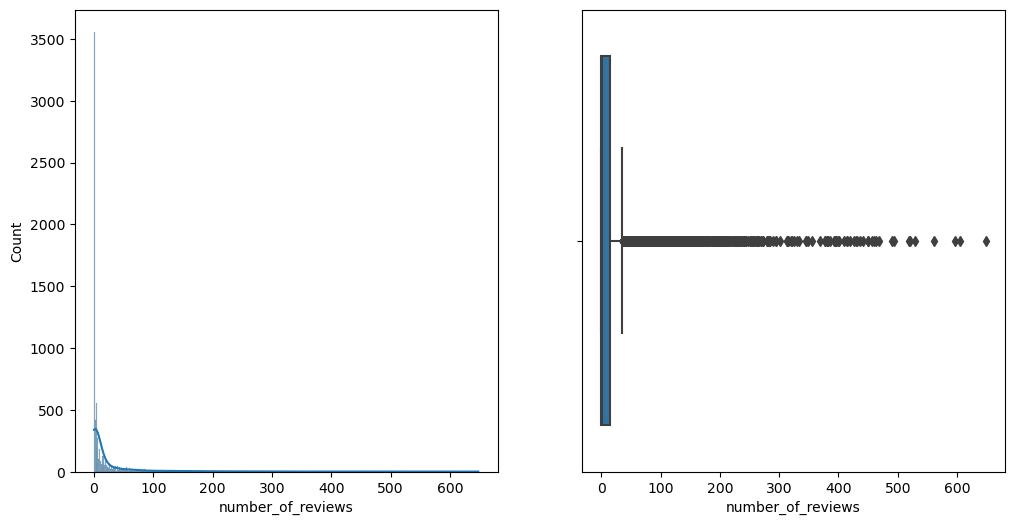

Los estadísticos son 
 count    7390.000000
mean       20.493640
std        52.089091
min         0.000000
25%         0.000000
50%         2.000000
75%        14.000000
max       648.000000
Name: number_of_reviews, dtype: float64
La mediana es 2.0
La moda es 0
El IQR es de 14.0
El CV es de 254.17

Para la variable review_scores_rating


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


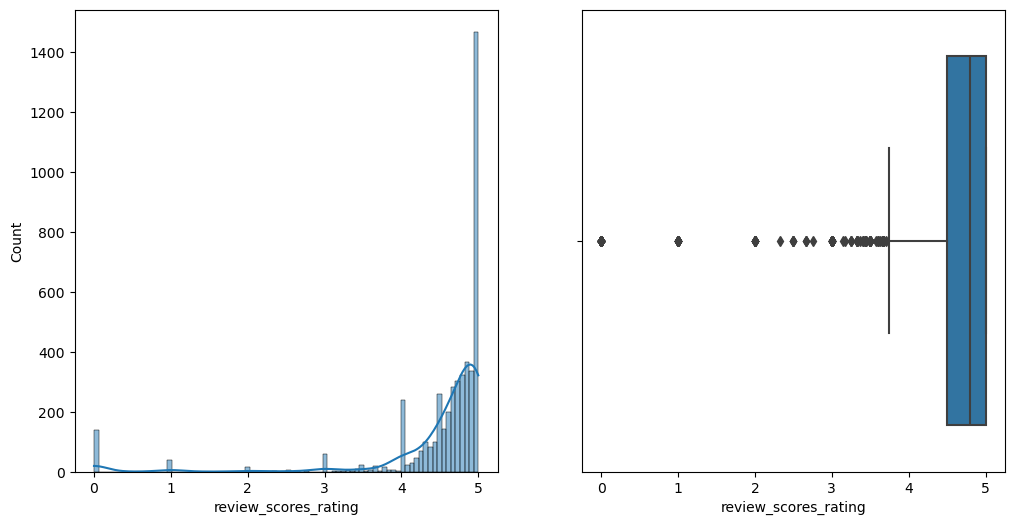

Los estadísticos son 
 count    4705.000000
mean        4.512561
std         0.945072
min         0.000000
25%         4.500000
50%         4.800000
75%         5.000000
max         5.000000
Name: review_scores_rating, dtype: float64
La mediana es 4.8
La moda es 5.0
El IQR es de 0.5
El CV es de 20.94

Para la variable calculated_host_listings_count


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


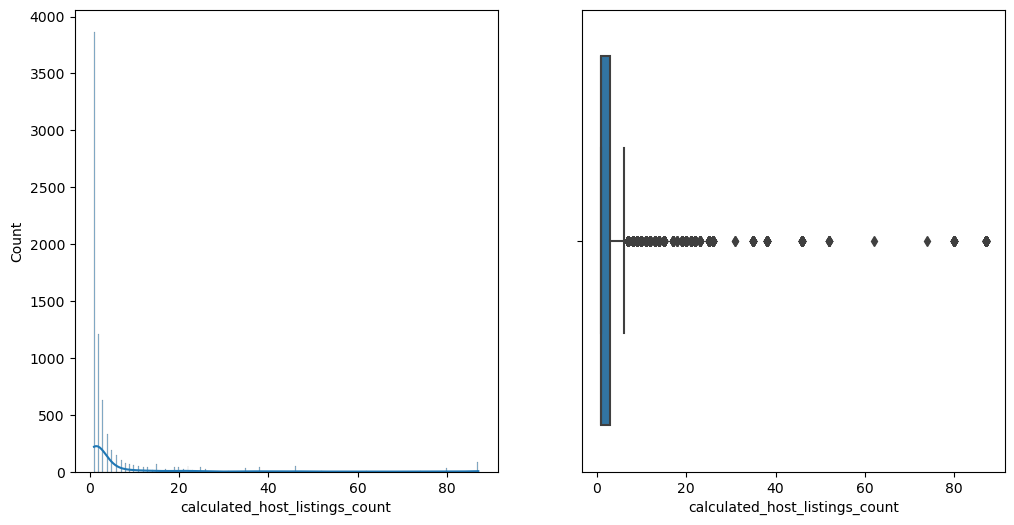

Los estadísticos son 
 count    7390.000000
mean        5.097158
std        12.222263
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        87.000000
Name: calculated_host_listings_count, dtype: float64
La mediana es 1.0
La moda es 1
El IQR es de 2.0
El CV es de 239.79

Para la variable bathrooms


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


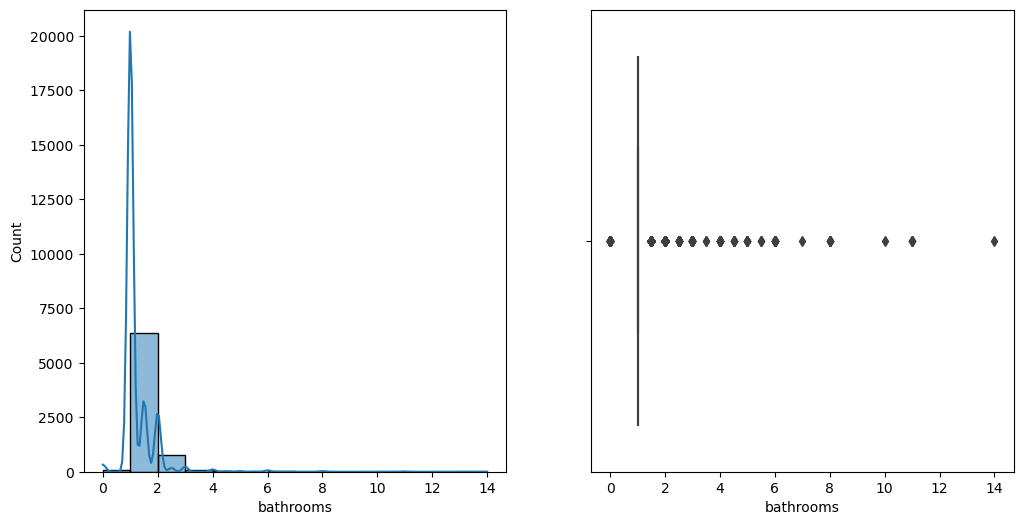

Los estadísticos son 
 count    7390.000000
mean        1.222666
std         0.637969
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        14.000000
Name: bathrooms, dtype: float64
La mediana es 1.0
La moda es 1.0
El IQR es de 0.0
El CV es de 52.18

Para la variable precio_m2


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


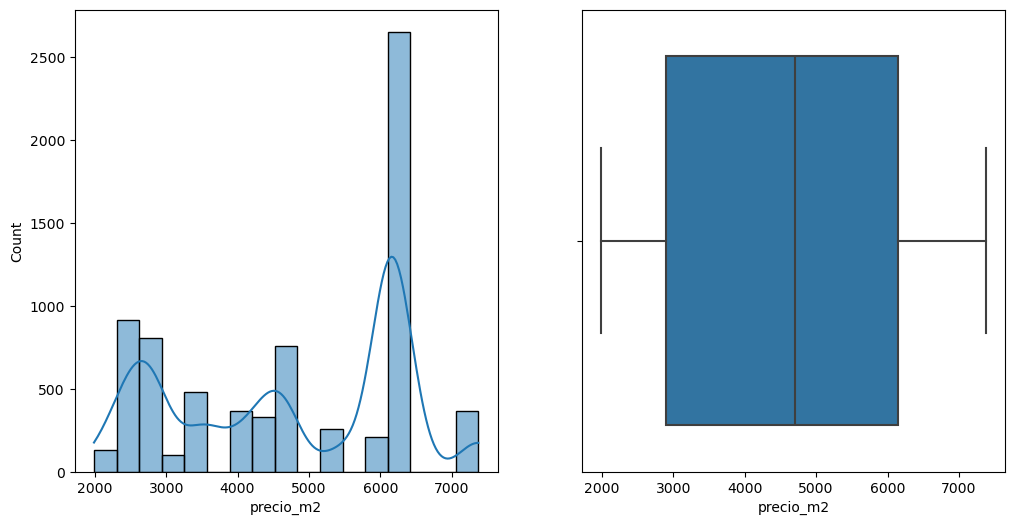

Los estadísticos son 
 count    7390.000000
mean     4737.424087
std      1589.715668
min      1988.000000
25%      2897.000000
50%      4700.000000
75%      6144.000000
max      7374.000000
Name: precio_m2, dtype: float64
La mediana es 4700.0
La moda es 6144
El IQR es de 3247.0
El CV es de 33.56

Para la variable price_accommodates


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


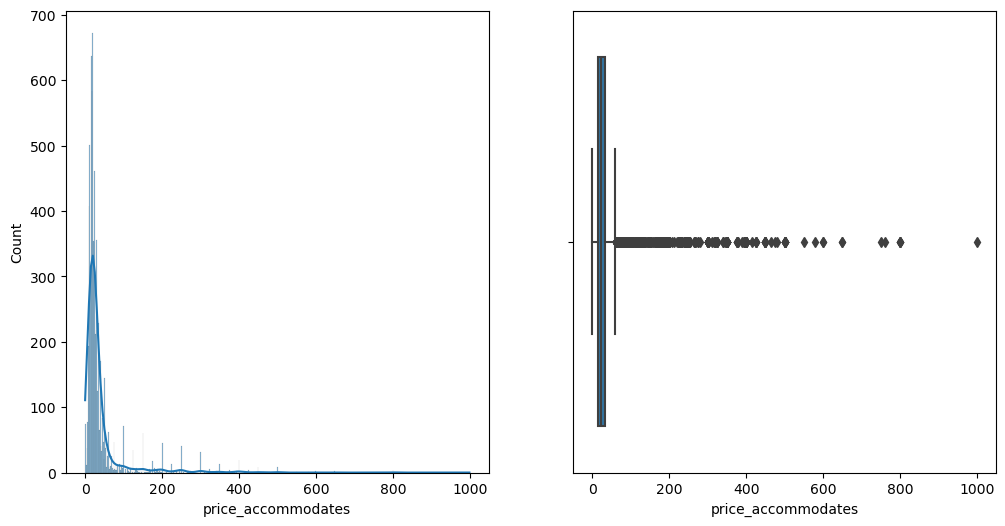

Los estadísticos son 
 count    7390.000000
mean       38.708657
std        63.124017
min         0.100000
25%        15.000000
50%        21.500000
75%        33.000000
max       999.000000
Name: price_accommodates, dtype: float64
La mediana es 21.5
La moda es 20.0
El IQR es de 18.0
El CV es de 163.07

Para la variable price_bedrooms


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


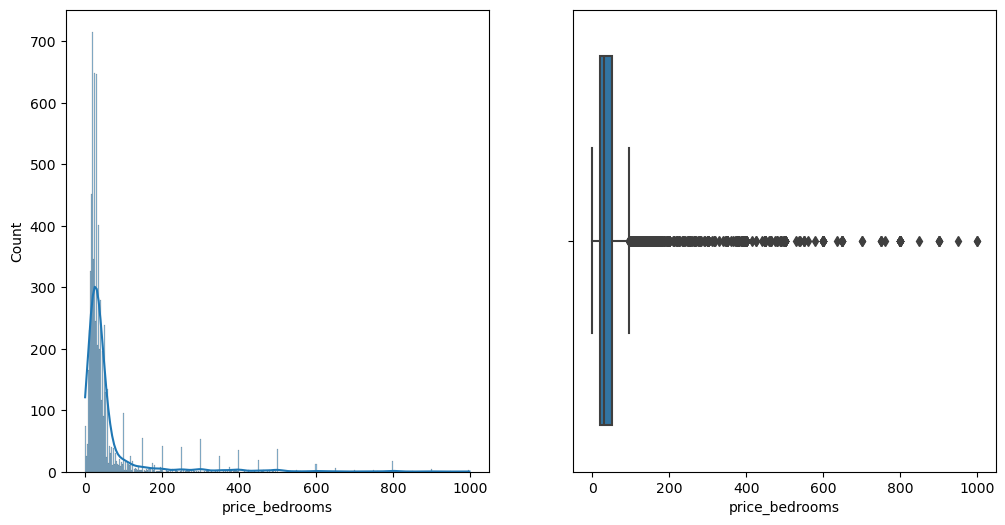

Los estadísticos son 
 count    7390.0
mean        inf
std         NaN
min         0.1
25%        20.0
50%        30.0
75%        50.0
max         inf
Name: price_bedrooms, dtype: float64
La mediana es 30.0
La moda es 30.0
El IQR es de 30.0
El CV es de nan

Para la variable antiguedad_host


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


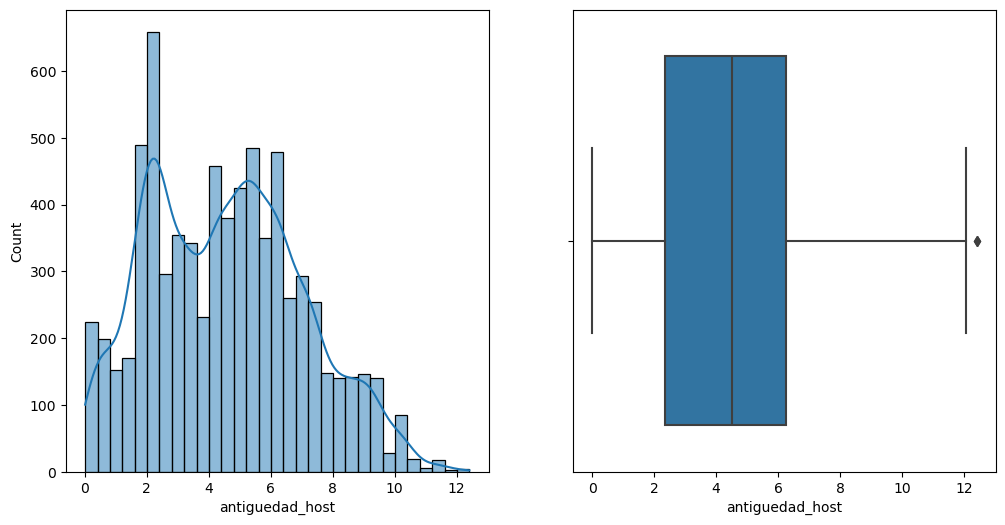

Los estadísticos son 
 count    7376.000000
mean        4.573827
std         2.479304
min         0.010000
25%         2.367500
50%         4.520000
75%         6.272500
max        12.410000
Name: antiguedad_host, dtype: float64
La mediana es 4.52
La moda es 0.77
El IQR es de 3.905
El CV es de 54.21



In [71]:
estadistica_descriptiva_numericas(df_private)

## Análsis univariable df_shared

In [72]:
df_shared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 227 to 18870
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              258 non-null    int64         
 1   host_id                         258 non-null    int64         
 2   host_is_superhost               258 non-null    object        
 3   name                            258 non-null    object        
 4   host_name                       258 non-null    object        
 5   host_since                      258 non-null    datetime64[ns]
 6   amenities                       258 non-null    object        
 7   host_listings_count             258 non-null    float64       
 8   neighbourhood_cleansed          258 non-null    object        
 9   neighbourhood_group_cleansed    258 non-null    object        
 10  latitude                        258 non-null    float64       
 11  longitu

### Variables categóricas


#### `host_is_superhost`

La moda de host_is_superhost es: f con un valor de 226 (87.60%)
La frecuencia absoluta mínima es de la variable t con un valor de 32 (12.40%)

host_is_superhost
f    87.596899
t    12.403101
Name: proportion, dtype: float64


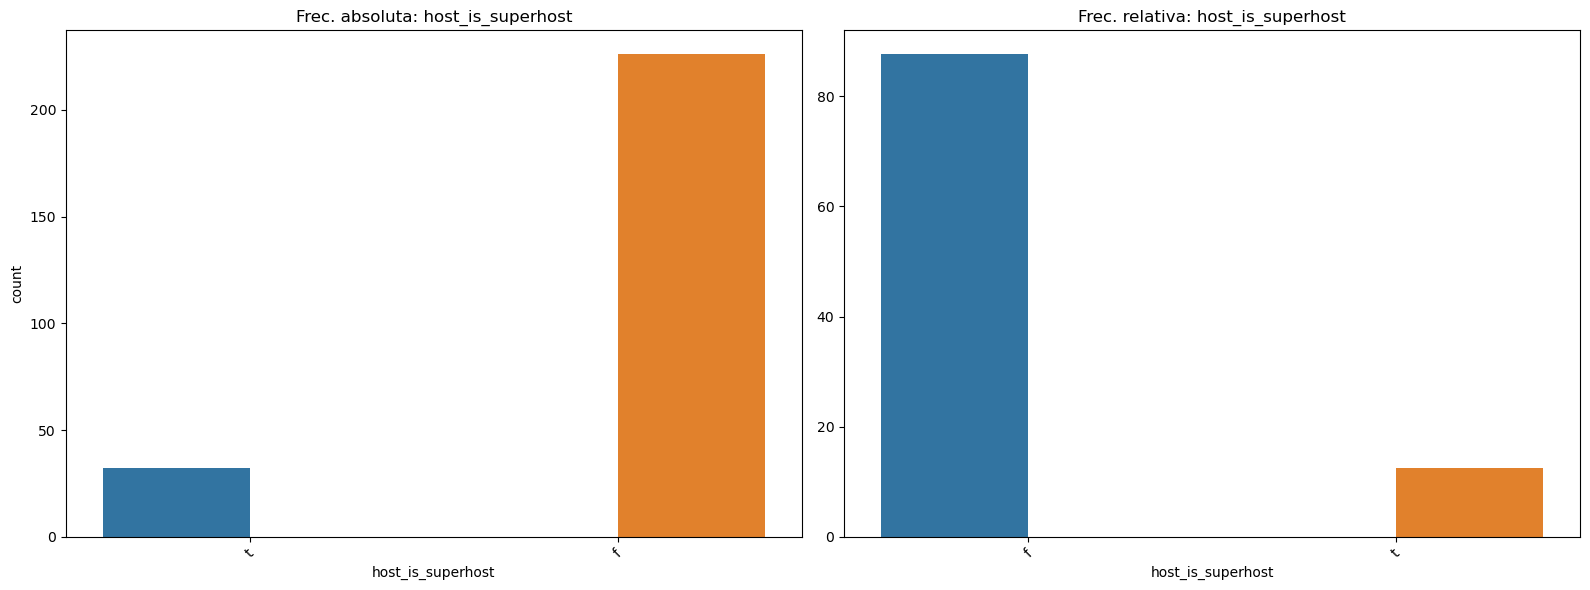

In [73]:
graficos_categoricas_individual(df_shared,'host_is_superhost')

##### Observación:
Tan solo un 12% es superhost en la oferta de habitaciones compartidas

#### `name `

In [74]:
df_shared['name'].value_counts()

name
Madrid Center: Puerta del Sol, Tirso de Molina       14
HABITACIÓN COMPARTIDA/SHARED ROOM CENTRAL MADRID      8
HABITACIÓN FEMENINA COMPARTIDA/SHARED FEMALE ROOM     7
ACOGEDORA HABITACIÓN COMPARTIDA CENTRO DE MADRID      4
OPEN MADRID - HABITACION MIXTA 6 PERSONAS             3
                                                     ..
Nice view                                             1
Cama en habitación compartida (1)                     1
Cama en habitación compartida (9)                     1
Cama en habitación compartida (6)                     1
habitacion para dormir                                1
Name: count, Length: 225, dtype: int64

No se puede sacar gran cosa de esto.

#### `host_name`

In [75]:
df_shared['host_name'].value_counts()

host_name
4 Bears          14
Isabel           11
Manuel           10
Safestay         10
Fabrizzio         9
                 ..
Anna              1
Crissi            1
Andres            1
Carlos            1
Gloria Estela     1
Name: count, Length: 138, dtype: int64

##### Observación: 
Algunos nombres coinciden que son los pisos propiedad de una sola empresa o bien que los gestiona.

#### 'amenities'

In [76]:
df_shared['amenities'].value_counts()

amenities
["Wifi", "Shampoo", "Breakfast", "First aid kit", "Air conditioning", "TV", "Smoke alarm", "Fire extinguisher", "Dedicated workspace", "Hangers", "Long term stays allowed", "Washer", "Dryer", "Essentials", "Host greets you", "Carbon monoxide alarm"]                                                                                                                                                                                                                                                8
["First aid kit", "Security cameras on property", "Long term stays allowed", "Wifi", "Air conditioning", "Dedicated workspace", "Hangers", "Cooking basics", "Carbon monoxide alarm", "Dishes and silverware", "Iron", "Coffee maker", "Hot water", "Hair dryer", "Refrigerator", "Microwave", "Bed linens", "Smoke alarm", "Fire extinguisher", "Paid parking off premises", "Luggage dropoff allowed", "Heating", "Essentials"]                                                                        8
["First 

In [77]:
df_shared['amenities'].unique()

array(['["Wifi", "Microwave", "Shampoo", "Extra pillows and blankets", "Dishes and silverware", "Cooking basics", "Iron", "TV with standard cable", "Bed linens", "First aid kit", "Oven", "Elevator", "Cable TV", "Dedicated workspace", "Hangers", "Hot water", "Long term stays allowed", "Washer", "Essentials", "Refrigerator"]',
       '["Long term stays allowed"]',
       '["Wifi", "Microwave", "Shampoo", "Extra pillows and blankets", "Breakfast", "Iron", "Essentials", "Bed linens", "Luggage dropoff allowed", "Fire extinguisher", "Children\\u2019s books and toys", "Coffee maker", "Dedicated workspace", "Hangers", "Hot water", "Heating", "Hair dryer", "Refrigerator", "Room-darkening shades"]',
       '["Wifi", "Air conditioning", "Heating", "Elevator", "Long term stays allowed", "Washer", "Dryer"]',
       '["Wifi", "First aid kit", "Air conditioning", "Fire extinguisher", "Elevator", "Long term stays allowed", "Heating"]',
       '["Wifi", "Shampoo", "Dishes and silverware", "Iron", "Firs

Demasiado texto como para saca conclusiones y similitudes.

#### `neighbourhood_cleansed`   

In [78]:
df_shared['neighbourhood_cleansed'].nunique()

70

In [79]:
df_shared['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Embajadores             44
Universidad             36
Justicia                20
Trafalgar               14
Sol                     13
                        ..
Campamento               1
San Isidro               1
Nueva España             1
Canillejas               1
Ciudad Universitaria     1
Name: count, Length: 70, dtype: int64

In [80]:
df_shared['neighbourhood_cleansed'].value_counts(normalize=True).round(3)*100

neighbourhood_cleansed
Embajadores             17.1
Universidad             14.0
Justicia                 7.8
Trafalgar                5.4
Sol                      5.0
                        ... 
Campamento               0.4
San Isidro               0.4
Nueva España             0.4
Canillejas               0.4
Ciudad Universitaria     0.4
Name: proportion, Length: 70, dtype: float64

In [81]:
df_shared['neighbourhood_cleansed'].unique()


array(['Lista', 'Embajadores', 'Universidad', 'Sol', 'Trafalgar',
       'San Diego', 'Chopera', 'Valdezarza', 'Gaztambide',
       'Hispanoamérica', 'Palacio', 'Prosperidad', 'San Pascual',
       'Justicia', 'Timón', 'Entrevías', 'Arapiles', 'Aluche', 'Comillas',
       'Guindalera', 'Concepción', 'Los Angeles', 'Pilar', 'San Andrés',
       'Orcasur', 'Los Rosales', 'Fuente del Berro', 'Ventas', 'Cortes',
       'Lucero', 'Pueblo Nuevo', 'Casco Histórico de Barajas',
       'Castillejos', 'Valdeacederas', 'Acacias', 'Vinateros',
       'San Juan Bautista', 'San Fermín', 'Campamento', 'Pradolongo',
       'Almagro', 'San Isidro', 'Nueva España', 'Palos de Moguer',
       'Canillejas', 'Simancas', 'Ciudad Jardín', 'Rosas', 'Rios Rosas',
       'Aguilas', 'Quintana', 'Ambroz', 'Cuatro Caminos', 'Delicias',
       'Santa Eugenia', 'Valdefuentes', 'Ibiza', 'Legazpi', 'Adelfas',
       'Atocha', 'Almenara', 'Salvador', 'Palomeras Bajas', 'Abrantes',
       'Buenavista', 'Casco Histórico d

##### Observaciones:
- Solo hay oferta en 70 de los 128 barrios.
- Los que más anuncios tienen son de (valor en %):
    - Embajadores             17.1
    - Universidad             14.0
    - Justicia                 7.8
    - Trafalgar                5.4
    - Sol                      5.0

- Los que menos anuncios tienen son de (valor en %):
    - Campamento               0.4
    - San Isidro               0.4
    - Nueva España             0.4
    - Canillejas               0.4
    - Ciudad Universitaria     0.4

#### `neighbourhood_group_cleansed`

In [82]:
df_shared['neighbourhood_group_cleansed'].nunique()

21

In [83]:
df_shared['neighbourhood_group_cleansed'].value_counts()

neighbourhood_group_cleansed
Centro                   131
Chamberí                  22
Villaverde                12
Ciudad Lineal             11
Latina                    11
Arganzuela                10
Puente de Vallecas         9
Salamanca                  8
Usera                      7
San Blas - Canillejas      7
Chamartín                  7
Tetuán                     5
Carabanchel                5
Villa de Vallecas          3
Barajas                    2
Moncloa - Aravaca          2
Retiro                     2
Fuencarral - El Pardo      1
Moratalaz                  1
Vicálvaro                  1
Hortaleza                  1
Name: count, dtype: int64

In [84]:
df_shared['neighbourhood_group_cleansed'].value_counts(normalize=True).round(3)*100

neighbourhood_group_cleansed
Centro                   50.8
Chamberí                  8.5
Villaverde                4.7
Ciudad Lineal             4.3
Latina                    4.3
Arganzuela                3.9
Puente de Vallecas        3.5
Salamanca                 3.1
Usera                     2.7
San Blas - Canillejas     2.7
Chamartín                 2.7
Tetuán                    1.9
Carabanchel               1.9
Villa de Vallecas         1.2
Barajas                   0.8
Moncloa - Aravaca         0.8
Retiro                    0.8
Fuencarral - El Pardo     0.4
Moratalaz                 0.4
Vicálvaro                 0.4
Hortaleza                 0.4
Name: proportion, dtype: float64

##### Observaciones:
Los 5 distritos con mayor número de anuncios son:
- Centro                   50.8
- Chamberí                  8.5
- Villaverde                4.7
- Ciudad Lineal             4.3
- Latina                    4.3

Los 5 distritos con menor número de anuncios son:
- Retiro                    0.8
- Fuencarral - El Pardo     0.4
- Moratalaz                 0.4
- Vicálvaro                 0.4
- Hortaleza                 0.4

#### `property_type`

In [85]:
df_shared['property_type'].nunique()

16

In [86]:
df_shared['property_type'].unique()

array(['Shared room in rental unit', 'Shared room in hut',
       'Shared room in bed and breakfast', 'Shared room in loft',
       'Shared room in hostel', 'Shared room in residential home',
       'Shared room in condominium (condo)', 'Shared room in dome house',
       'Shared room in guesthouse', 'Shared room in tiny house',
       'Shared room in townhouse', 'Shared room in chalet',
       'Shared room in casa particular', 'Shared room in hotel',
       'Shared room in serviced apartment', 'Shared room'], dtype=object)

In [87]:
df_shared['property_type'].value_counts()

property_type
Shared room in rental unit            140
Shared room in hostel                  35
Shared room in residential home        26
Shared room in bed and breakfast       20
Shared room in condominium (condo)      9
Shared room in loft                     8
Shared room in hotel                    7
Shared room in casa particular          3
Shared room                             3
Shared room in hut                      1
Shared room in dome house               1
Shared room in guesthouse               1
Shared room in tiny house               1
Shared room in townhouse                1
Shared room in chalet                   1
Shared room in serviced apartment       1
Name: count, dtype: int64

In [88]:
df_shared['property_type'].value_counts(normalize=True).round(3)*100

property_type
Shared room in rental unit            54.3
Shared room in hostel                 13.6
Shared room in residential home       10.1
Shared room in bed and breakfast       7.8
Shared room in condominium (condo)     3.5
Shared room in loft                    3.1
Shared room in hotel                   2.7
Shared room in casa particular         1.2
Shared room                            1.2
Shared room in hut                     0.4
Shared room in dome house              0.4
Shared room in guesthouse              0.4
Shared room in tiny house              0.4
Shared room in townhouse               0.4
Shared room in chalet                  0.4
Shared room in serviced apartment      0.4
Name: proportion, dtype: float64

##### Observaciones:
Del tipo de propiedad (dentro de la variable 'Shared room'), en %:
- Shared room in rental unit            54.3
- Shared room in hostel                 13.6
- Shared room in residential home       10.1
- Shared room in bed and breakfast       7.8
- Shared room in condominium (condo)     3.5


#### `price_disc`

In [89]:
df_shared['price_disc'].value_counts()

price_disc
01muy_bajo    173
02bajo         47
05muy_alto     26
04alto          8
03medio         4
Name: count, dtype: int64

La moda de price_disc es: 01muy_bajo con un valor de 173 (67.05%)
La frecuencia absoluta mínima es de la variable 03medio con un valor de 4 (1.55%)

price_disc
01muy_bajo    67.054264
02bajo        18.217054
05muy_alto    10.077519
04alto         3.100775
03medio        1.550388
Name: proportion, dtype: float64


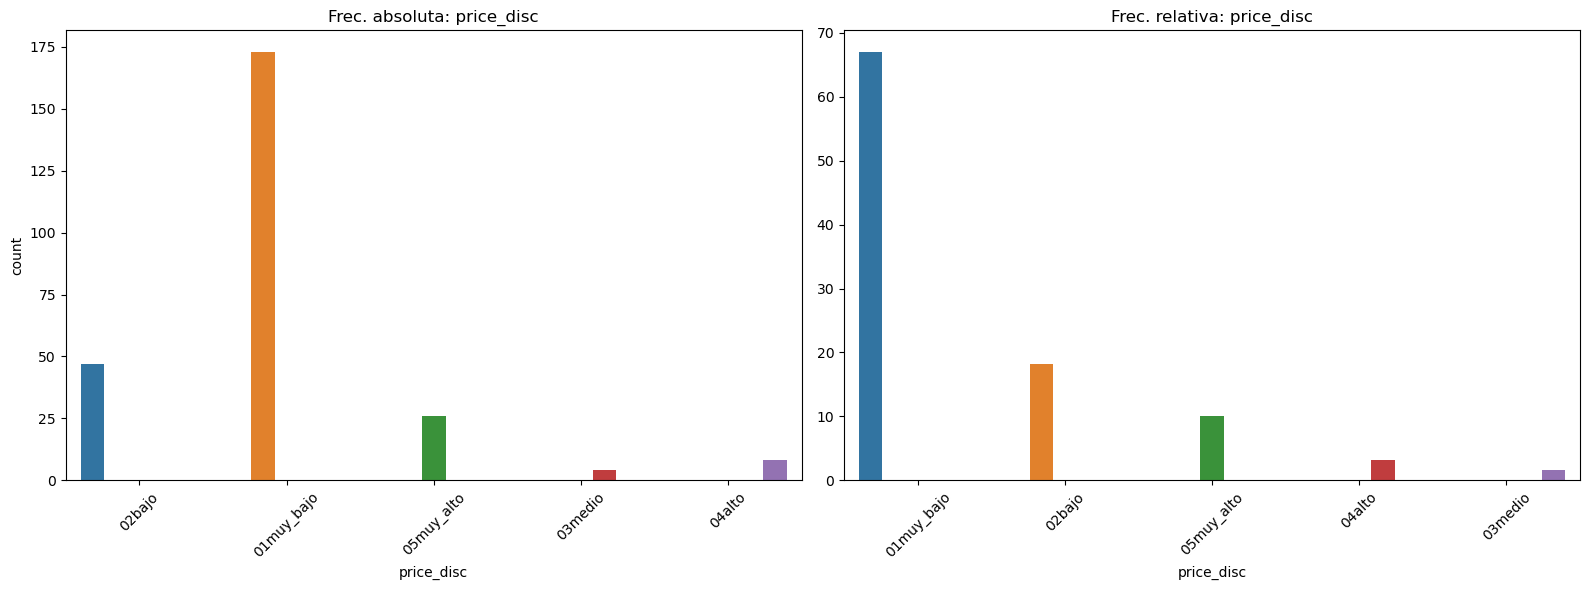

In [90]:
graficos_categoricas_individual(df_shared,'price_disc')

##### Observaciones:
- El mayor porcentaje tiene un valor muy bajo (67,05%), es decir, por debajo de 30€, seguido de precio bajo entre 30 y 60€ con un 18,2% y de un 10% por precios muy altos ¿?


#### `accommodates_disc`

In [91]:
df_shared['accommodates_disc'].value_counts()

accommodates_disc
01individual    129
02parejas        77
03familias       35
04grupos         17
Name: count, dtype: int64

La moda de accommodates_disc es: 01individual con un valor de 129 (50.00%)
La frecuencia absoluta mínima es de la variable 04grupos con un valor de 17 (6.59%)

accommodates_disc
01individual    50.000000
02parejas       29.844961
03familias      13.565891
04grupos         6.589147
Name: proportion, dtype: float64


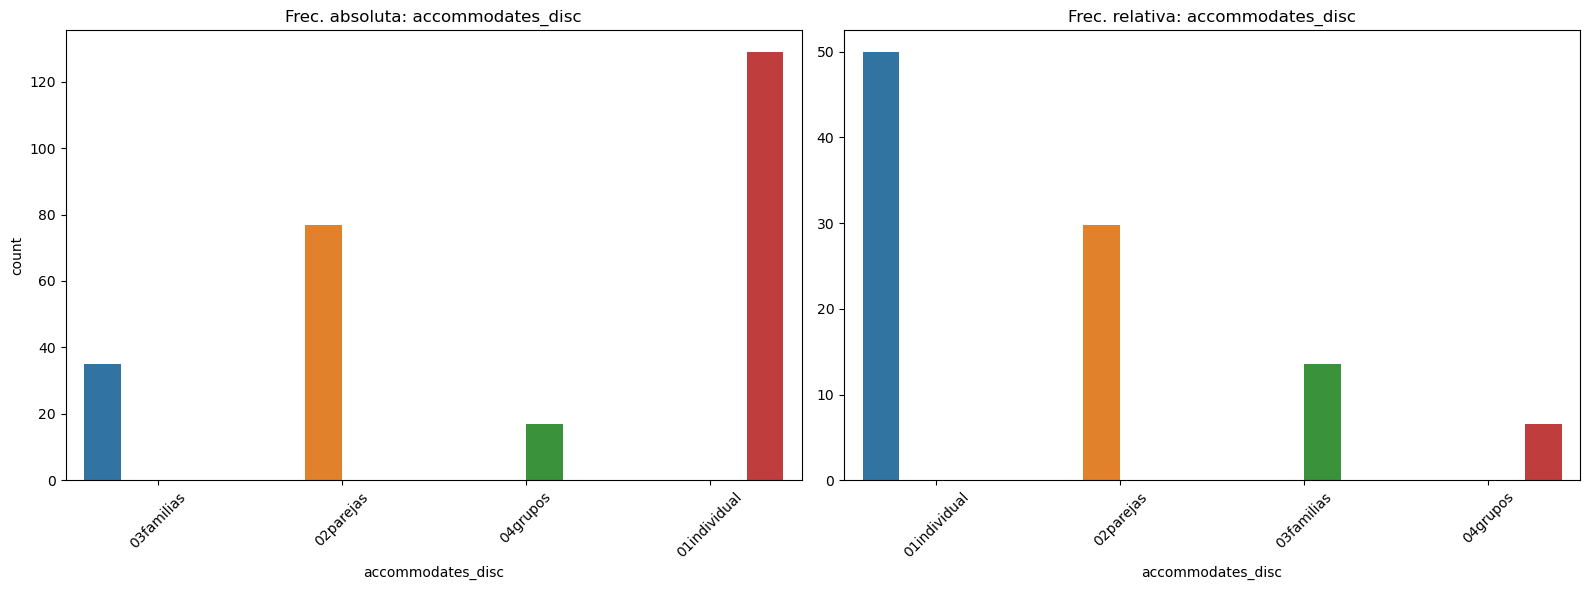

In [92]:
graficos_categoricas_individual(df_shared,'accommodates_disc')

##### Observaciones:
- La mayor parte de la oferta de pisos va encaminada a 1- 2 personas (50% y 29,8%) respectivamente.
- Algo lógico teniendo en cuenta que son solo habitaciones.
    

#### `propietarios_disc`

In [93]:
df_shared['propietarios_disc'].value_counts()

propietarios_disc
01_particular             85
03_grandes_inversores     84
02_pequeños_inversores    61
04_grandes_empresas       28
Name: count, dtype: int64

La moda de propietarios_disc es: 01_particular con un valor de 85 (32.95%)
La frecuencia absoluta mínima es de la variable 04_grandes_empresas con un valor de 28 (10.85%)

propietarios_disc
01_particular             32.945736
03_grandes_inversores     32.558140
02_pequeños_inversores    23.643411
04_grandes_empresas       10.852713
Name: proportion, dtype: float64


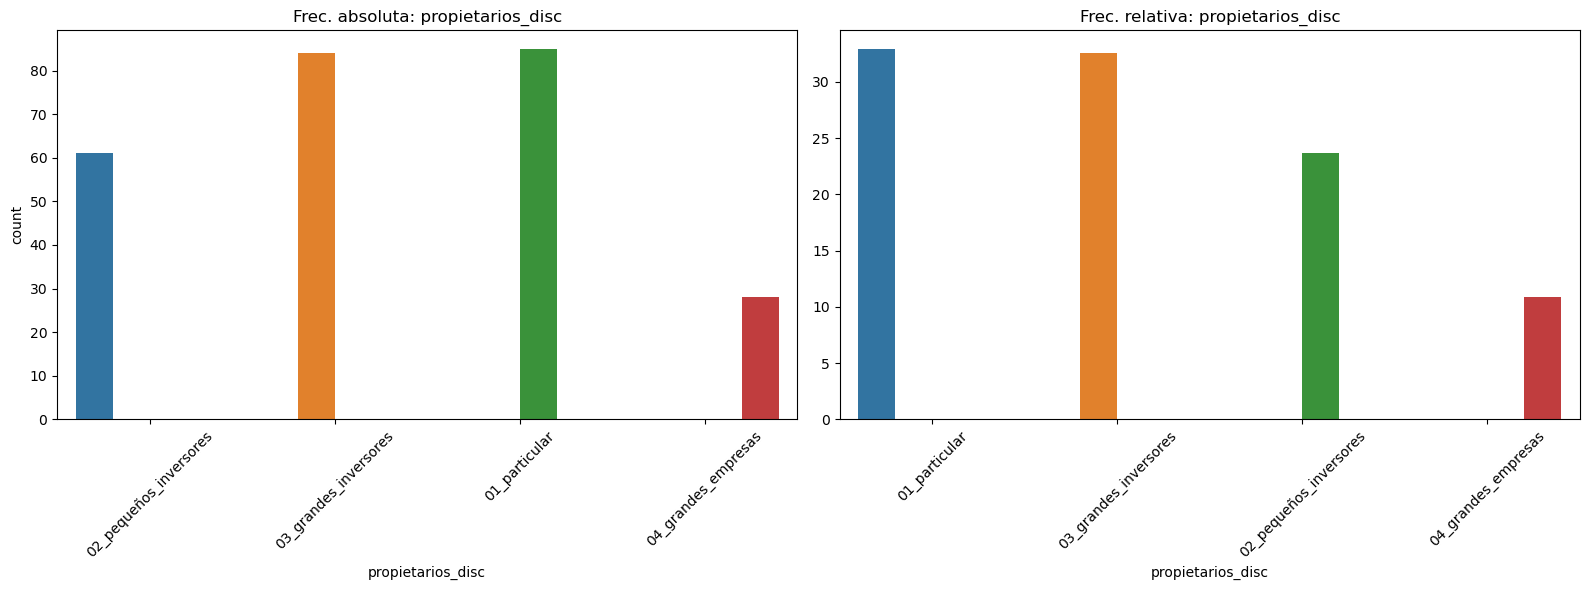

In [94]:
graficos_categoricas_individual(df_shared,'propietarios_disc')

##### Observaciones:
- La oferta de habitaciones compartidas está repartida entre particulares, grandes y pequeños inversores (32.9%, 32,55% y 23,6% respectivamente)
- Algo curioso...

### `segmentacion_mercado`

In [95]:
df_shared['segmentacion_mercado'].value_counts()

segmentacion_mercado
mayoria_mercado         240
lujo                     15
oportunismo_champion      3
Name: count, dtype: int64

In [96]:
df_shared['segmentacion_mercado'].value_counts(normalize=True).round(3)*100

segmentacion_mercado
mayoria_mercado         93.0
lujo                     5.8
oportunismo_champion     1.2
Name: proportion, dtype: float64

La moda de segmentacion_mercado es: mayoria_mercado con un valor de 240 (93.02%)
La frecuencia absoluta mínima es de la variable oportunismo_champion con un valor de 3 (1.16%)

segmentacion_mercado
mayoria_mercado         93.023256
lujo                     5.813953
oportunismo_champion     1.162791
Name: proportion, dtype: float64


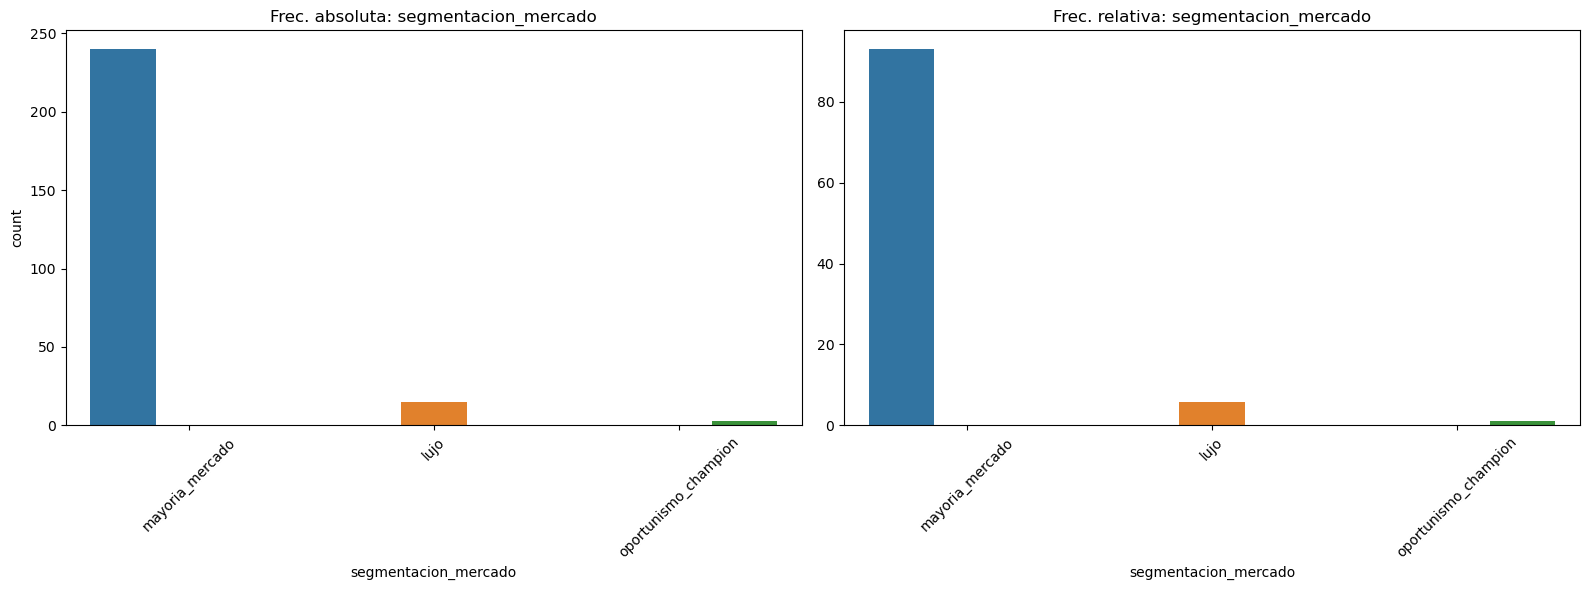

In [97]:
graficos_categoricas_individual(df_shared,'segmentacion_mercado')

### Variable numérica

#### Primer análisis

In [98]:
lista = variables_numericas(df_shared)
df_shared[lista].describe().T

,count,mean,std,min,25%,50%,75%,max
host_listings_count,258.0,6.519380,8.248194,0.00,1.00,2.50,10.000,36.0
accommodates,258.0,2.116279,1.784620,1.00,1.00,1.50,2.000,10.0
bedrooms,258.0,1.000000,0.000000,1.00,1.00,1.00,1.000,1.0
beds,258.0,3.000000,2.793823,0.00,1.00,2.00,4.000,12.0
price,258.0,61.900690,121.530967,1.00,15.25,23.00,40.000,900.0
minimum_nights,258.0,4.860465,32.026192,1.00,1.00,1.00,1.000,365.0
maximum_nights,258.0,720.624031,498.699853,1.00,60.00,1125.00,1125.000,1125.0
number_of_reviews,258.0,12.569767,35.231267,0.00,0.00,1.50,9.000,370.0
review_scores_rating,159.0,4.433522,0.972525,0.00,4.46,4.72,5.000,5.0
calculated_host_listings_count,258.0,6.383721,6.356776,1.00,1.00,4.00,10.000,25.0


Para la variable host_listings_count


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


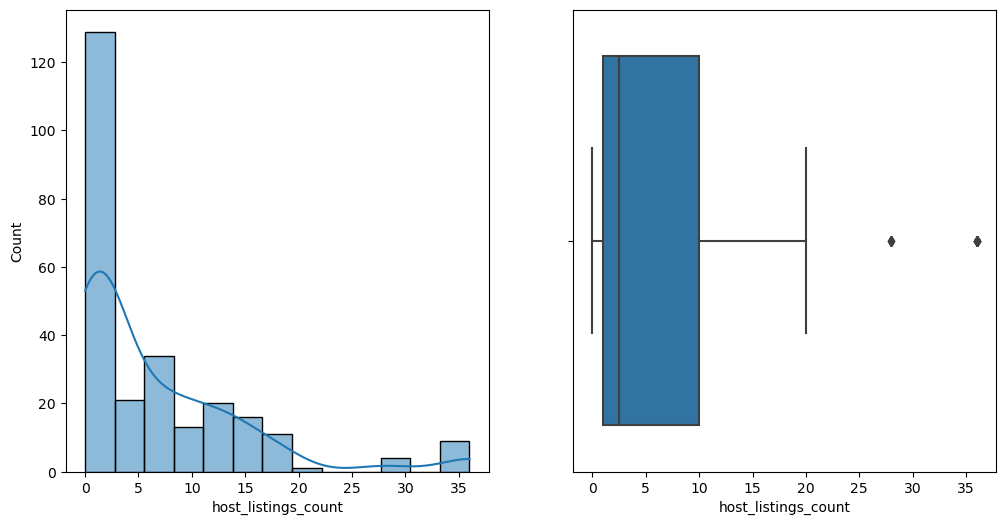

Los estadísticos son 
 count    258.000000
mean       6.519380
std        8.248194
min        0.000000
25%        1.000000
50%        2.500000
75%       10.000000
max       36.000000
Name: host_listings_count, dtype: float64
La mediana es 2.5
La moda es 1.0
El IQR es de 9.0
El CV es de 126.52

Para la variable accommodates


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


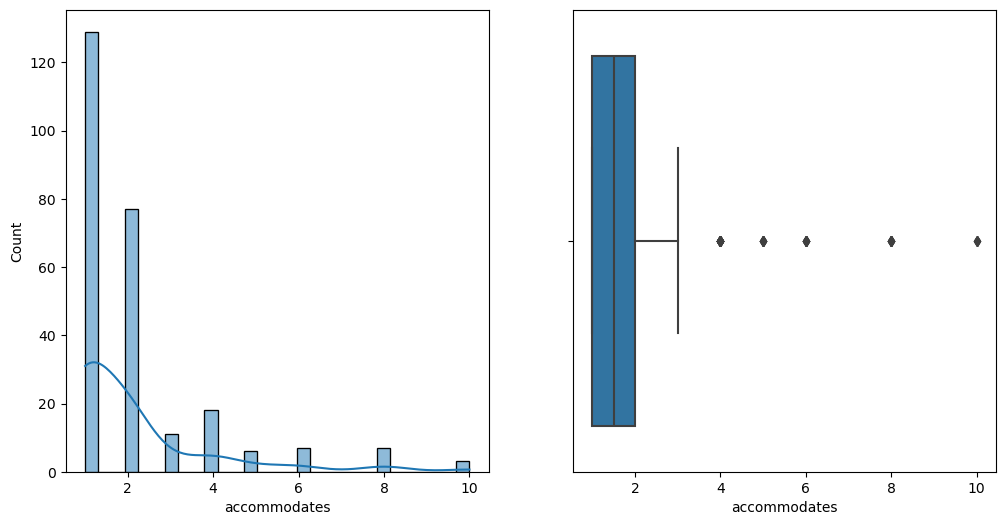

Los estadísticos son 
 count    258.000000
mean       2.116279
std        1.784620
min        1.000000
25%        1.000000
50%        1.500000
75%        2.000000
max       10.000000
Name: accommodates, dtype: float64
La mediana es 1.5
La moda es 1
El IQR es de 1.0
El CV es de 84.33

Para la variable bedrooms


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


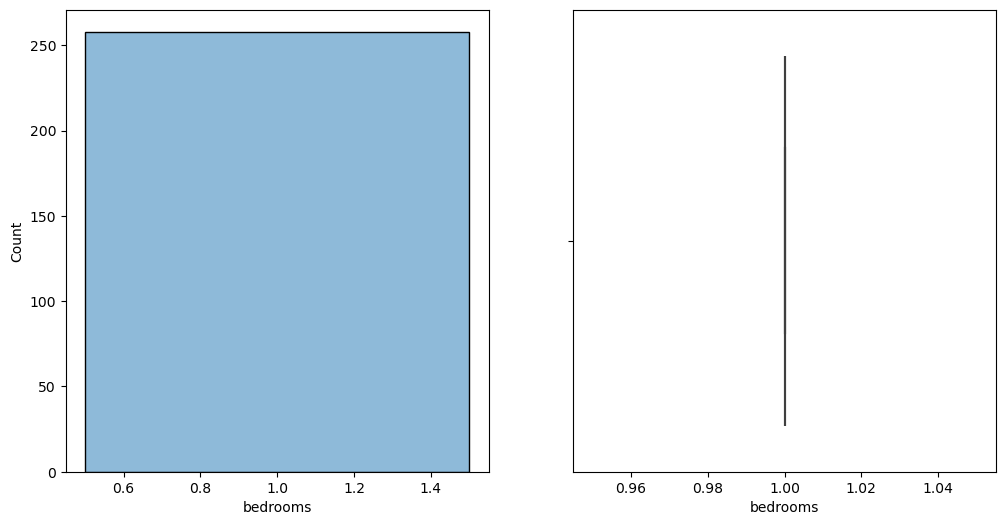

Los estadísticos son 
 count    258.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: bedrooms, dtype: float64
La mediana es 1.0
La moda es 1
El IQR es de 0.0
El CV es de 0.0

Para la variable beds


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


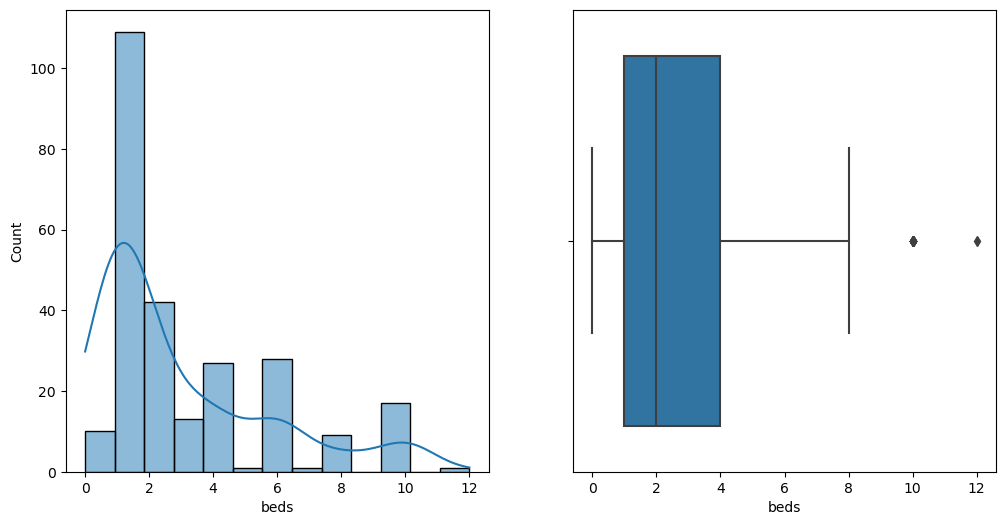

Los estadísticos son 
 count    258.000000
mean       3.000000
std        2.793823
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       12.000000
Name: beds, dtype: float64
La mediana es 2.0
La moda es 1
El IQR es de 3.0
El CV es de 93.13

Para la variable price


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


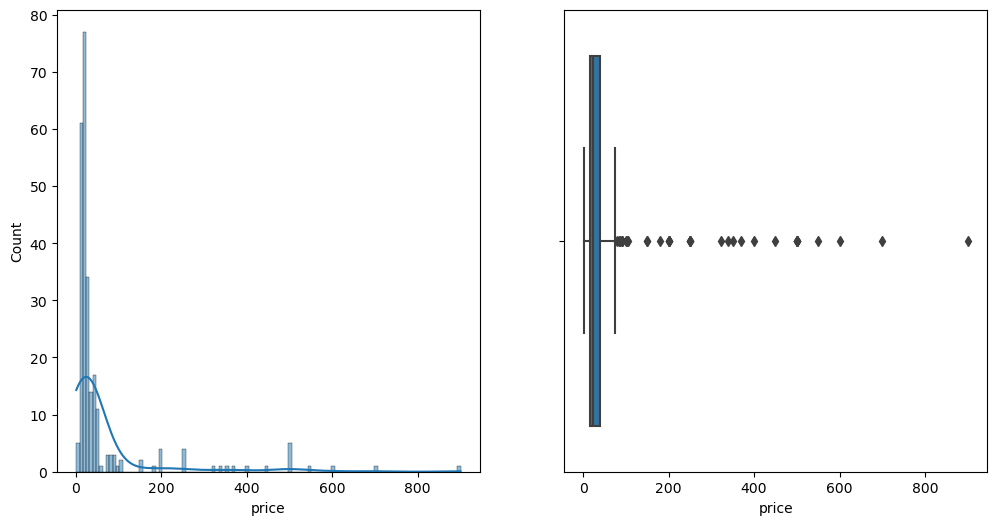

Los estadísticos son 
 count    258.000000
mean      61.900690
std      121.530967
min        1.000000
25%       15.250000
50%       23.000000
75%       40.000000
max      900.000000
Name: price, dtype: float64
La mediana es 23.0
La moda es 14.0
El IQR es de 24.75
El CV es de 196.33

Para la variable minimum_nights


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


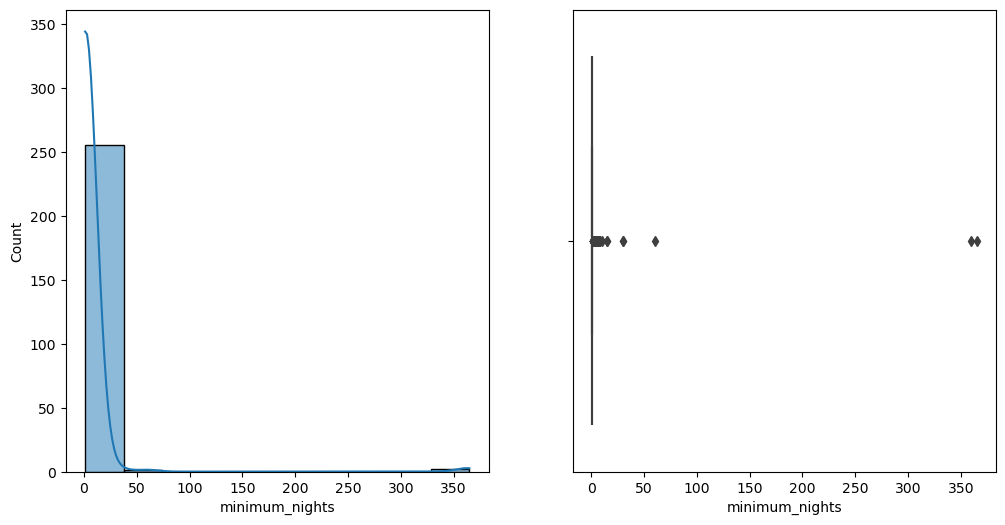

Los estadísticos son 
 count    258.000000
mean       4.860465
std       32.026192
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      365.000000
Name: minimum_nights, dtype: float64
La mediana es 1.0
La moda es 1
El IQR es de 0.0
El CV es de 658.91

Para la variable maximum_nights


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


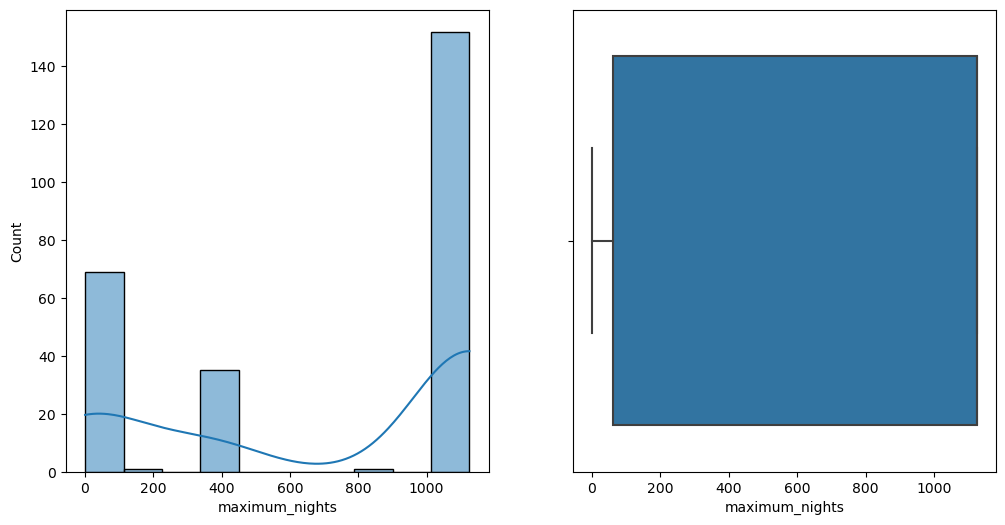

Los estadísticos son 
 count     258.000000
mean      720.624031
std       498.699853
min         1.000000
25%        60.000000
50%      1125.000000
75%      1125.000000
max      1125.000000
Name: maximum_nights, dtype: float64
La mediana es 1125.0
La moda es 1125
El IQR es de 1065.0
El CV es de 69.2

Para la variable number_of_reviews


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


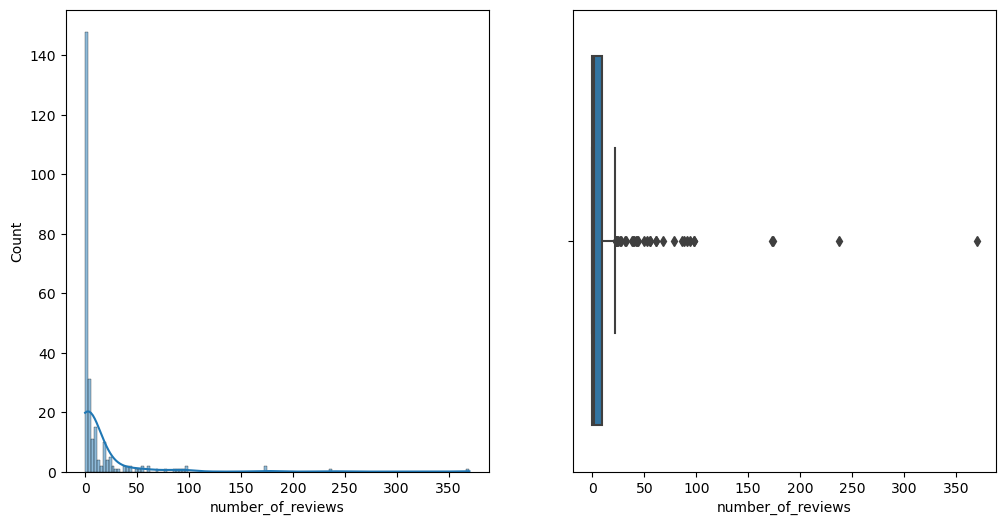

Los estadísticos son 
 count    258.000000
mean      12.569767
std       35.231267
min        0.000000
25%        0.000000
50%        1.500000
75%        9.000000
max      370.000000
Name: number_of_reviews, dtype: float64
La mediana es 1.5
La moda es 0
El IQR es de 9.0
El CV es de 280.29

Para la variable review_scores_rating


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


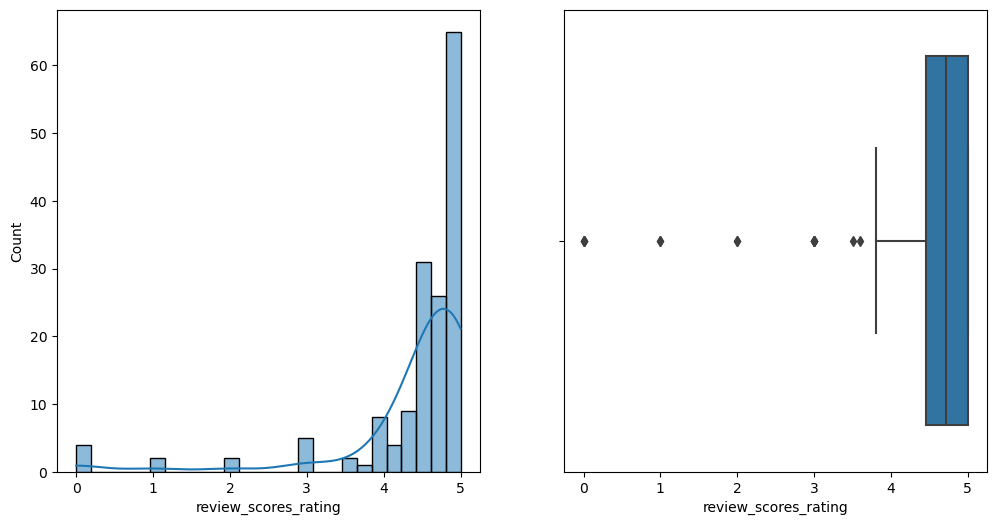

Los estadísticos son 
 count    159.000000
mean       4.433522
std        0.972525
min        0.000000
25%        4.460000
50%        4.720000
75%        5.000000
max        5.000000
Name: review_scores_rating, dtype: float64
La mediana es 4.72
La moda es 5.0
El IQR es de 0.54
El CV es de 21.94

Para la variable calculated_host_listings_count


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


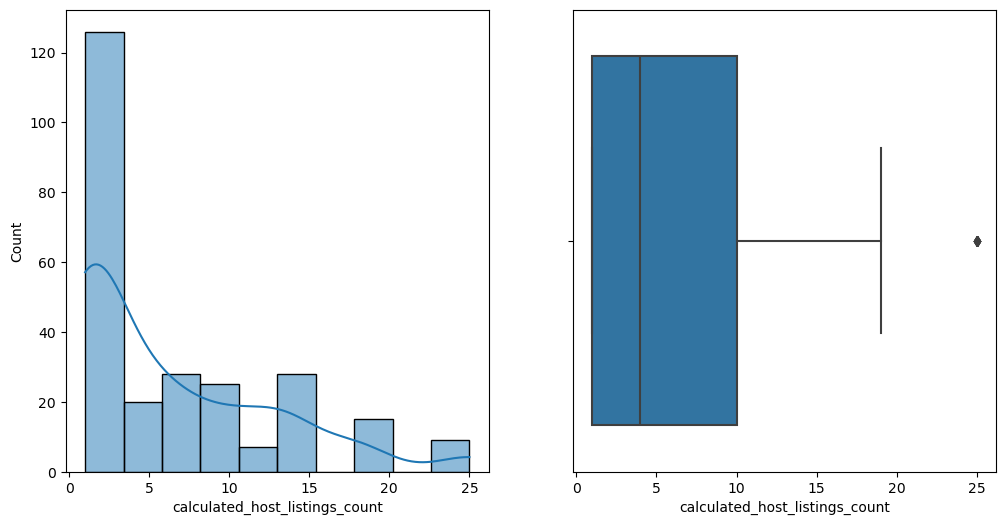

Los estadísticos son 
 count    258.000000
mean       6.383721
std        6.356776
min        1.000000
25%        1.000000
50%        4.000000
75%       10.000000
max       25.000000
Name: calculated_host_listings_count, dtype: float64
La mediana es 4.0
La moda es 1
El IQR es de 9.0
El CV es de 99.58

Para la variable bathrooms


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


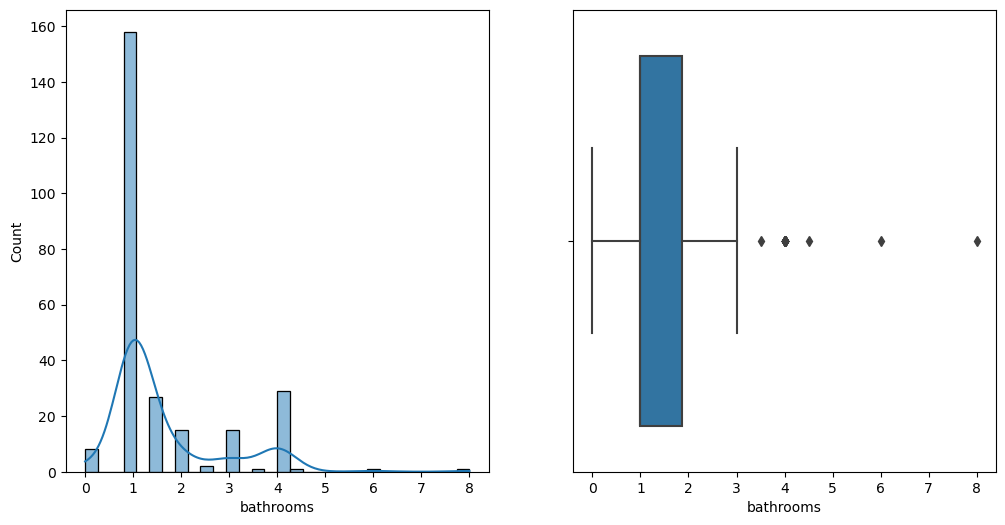

Los estadísticos son 
 count    258.000000
mean       1.614341
std        1.167619
min        0.000000
25%        1.000000
50%        1.000000
75%        1.875000
max        8.000000
Name: bathrooms, dtype: float64
La mediana es 1.0
La moda es 1.0
El IQR es de 0.875
El CV es de 72.33

Para la variable precio_m2


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


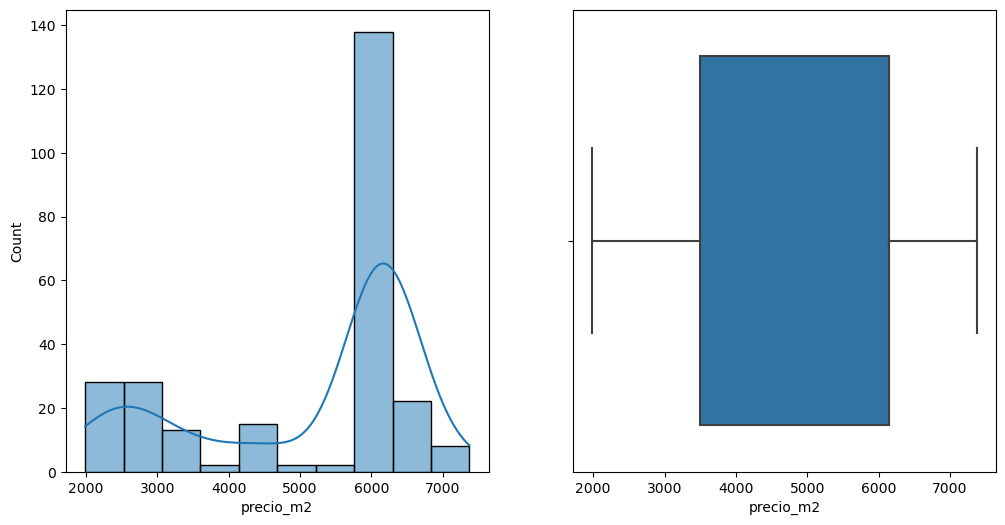

Los estadísticos son 
 count     258.000000
mean     5139.453488
std      1598.579177
min      1988.000000
25%      3497.000000
50%      6144.000000
75%      6144.000000
max      7374.000000
Name: precio_m2, dtype: float64
La mediana es 6144.0
La moda es 6144
El IQR es de 2647.0
El CV es de 31.1

Para la variable price_accommodates


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


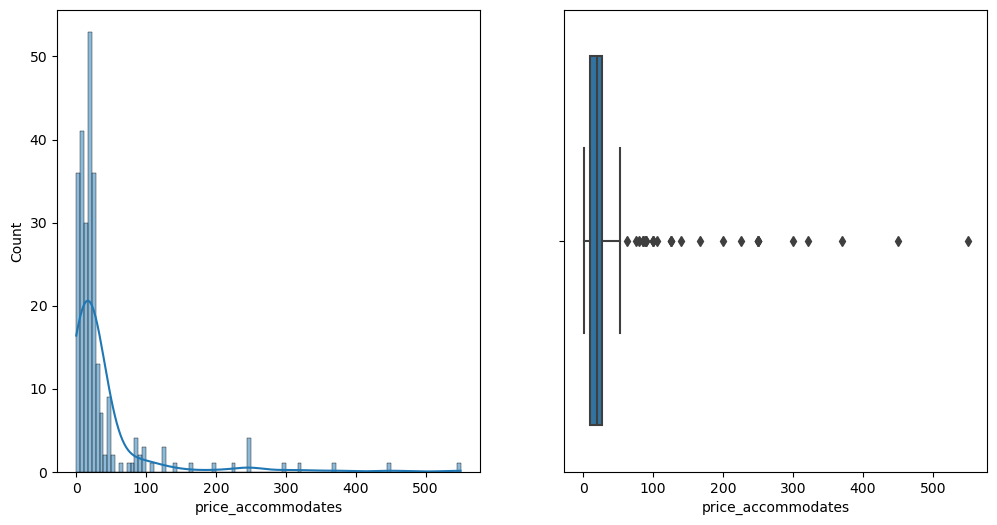

Los estadísticos son 
 count    258.000000
mean      36.027579
std       66.608122
min        0.250000
25%        9.250000
50%       20.000000
75%       27.000000
max      550.000000
Name: price_accommodates, dtype: float64
La mediana es 20.0
La moda es 21.0
El IQR es de 17.75
El CV es de 184.88



In [99]:
estadistica_descriptiva_numericas(df_shared)